In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
from scipy import stats
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv', sep=';')
data.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY':'LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE':'CONFIDENCE'},inplace=True)
data['LITHOLOGY'] = data['LITHOLOGY'].map({30000:'Sandstone', 65030:'Sandstone/Shale', 65000:'Shale', 80000:'Marl', 74000:'Dolomite', 70000:'Limestone', 70032:'Chalk', 
                                           88000:'Halite', 86000:'Anhydrite', 99000:'Tuff', 90000:'Coal', 93000:'Basement'})
data.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,LITHOLOGY,CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,Shale,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,Shale,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,Shale,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,Shale,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,Shale,1.0


In [3]:
data['LITHOLOGY'].value_counts()

Shale              720803
Sandstone          168937
Sandstone/Shale    150455
Limestone           56320
Marl                33329
Tuff                15245
Chalk               10513
Halite               8213
Coal                 3820
Dolomite             1688
Anhydrite            1085
Basement              103
Name: LITHOLOGY, dtype: int64

Los valores actuales de la litología serán mapeados a nuevos valores para facilitar su analisis, los nuevos valores se presentan a continuación:
* 30000 - Arenisca             ->  1
* 65030 – Arenisca/Lutitas     ->  2
* 65000 - Lutitas              ->  3
* 80000 - Marl                 ->  4
* 74000 - Dolimita             ->  5
* 70000 - Caliza               ->  6
* 70032 - Chalk                ->  7
* 88000 - Halite               ->  8
* 86000 - Anhidrita            ->  9
* 99000 - Toba                 ->  10
* 90000 - Hulla                ->  11
* 93000 - Crystalline Basement ->  12

In [4]:
#data['LITHOLOGY'] = data['LITHOLOGY'].map({30000:'Sandstone', 65030:'Sandstone/Shale', 65000:'Shale', 80000:'Marl', 74000:'Dolomite', 70000:'Limestone', 70032:'Chalk', 
#                                           88000:'Halite', 86000:'Anhydrite', 99000:'Tuff', 90000:'Coal', 93000:'Crystalline Basement'})

In [ ]:
data['LITHOLOGY'].value_counts()

Shale              720803
Sandstone          168937
Sandstone/Shale    150455
Limestone           56320
Marl                33329
Tuff                15245
Chalk               10513
Halite               8213
Coal                 3820
Dolomite             1688
Anhydrite            1085
Basement              103
Name: LITHOLOGY, dtype: int64

In [5]:
data['CONFIDENCE'].value_counts()

1.0    1013705
2.0     121018
3.0      35609
Name: CONFIDENCE, dtype: int64

Dejando solo datos con un grado de confianza 1.

<AxesSubplot:>

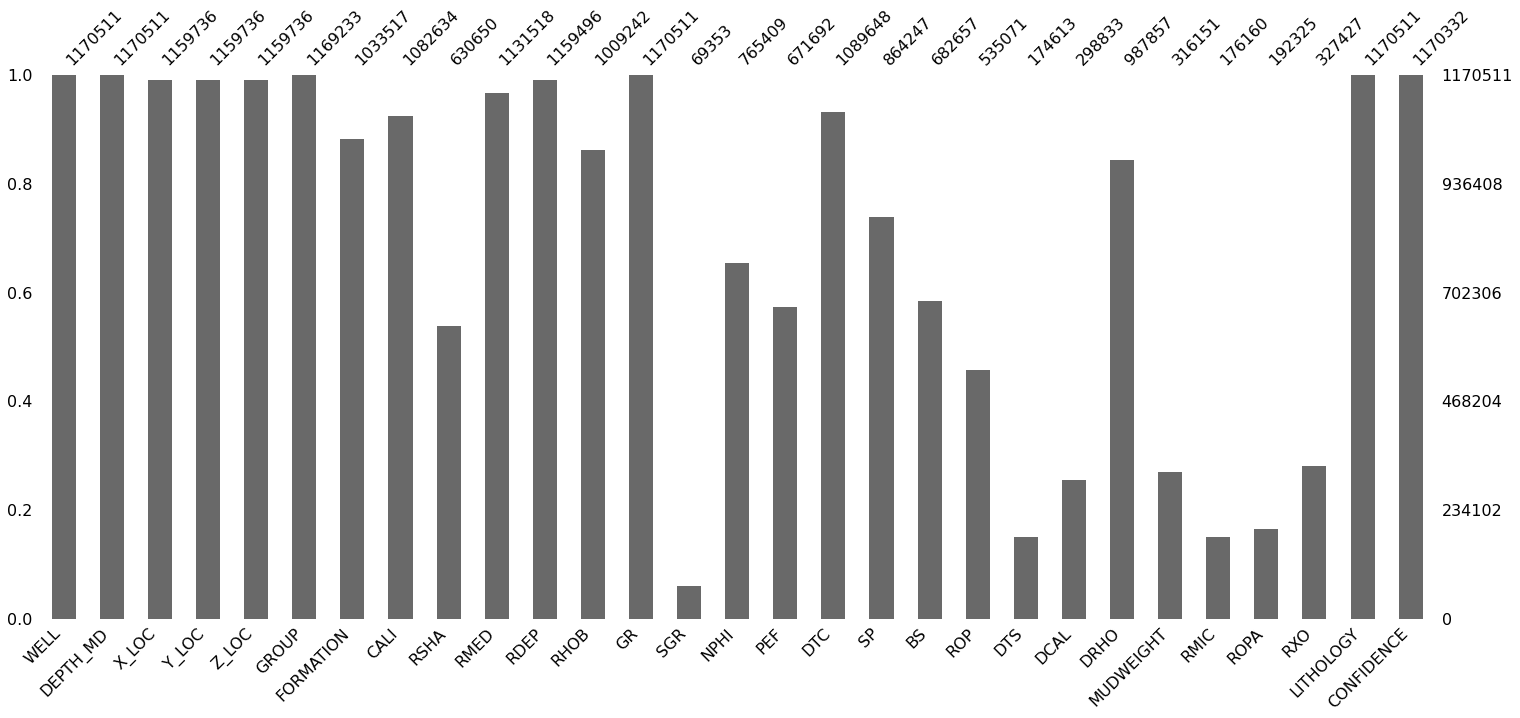

In [6]:
missingno.bar(data)

In [7]:
for i in data.columns:
    missing = np.mean(data[i].isnull())
    print('{} - {}%'.format(i, round(missing*100)))

WELL - 0%
DEPTH_MD - 0%
X_LOC - 1%
Y_LOC - 1%
Z_LOC - 1%
GROUP - 0%
FORMATION - 12%
CALI - 8%
RSHA - 46%
RMED - 3%
RDEP - 1%
RHOB - 14%
GR - 0%
SGR - 94%
NPHI - 35%
PEF - 43%
DTC - 7%
SP - 26%
BS - 42%
ROP - 54%
DTS - 85%
DCAL - 74%
DRHO - 16%
MUDWEIGHT - 73%
RMIC - 85%
ROPA - 84%
RXO - 72%
LITHOLOGY - 0%
CONFIDENCE - 0%


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 29 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   WELL        1170511 non-null  object 
 1   DEPTH_MD    1170511 non-null  float64
 2   X_LOC       1159736 non-null  float64
 3   Y_LOC       1159736 non-null  float64
 4   Z_LOC       1159736 non-null  float64
 5   GROUP       1169233 non-null  object 
 6   FORMATION   1033517 non-null  object 
 7   CALI        1082634 non-null  float64
 8   RSHA        630650 non-null   float64
 9   RMED        1131518 non-null  float64
 10  RDEP        1159496 non-null  float64
 11  RHOB        1009242 non-null  float64
 12  GR          1170511 non-null  float64
 13  SGR         69353 non-null    float64
 14  NPHI        765409 non-null   float64
 15  PEF         671692 non-null   float64
 16  DTC         1089648 non-null  float64
 17  SP          864247 non-null   float64
 18  BS          682657 non

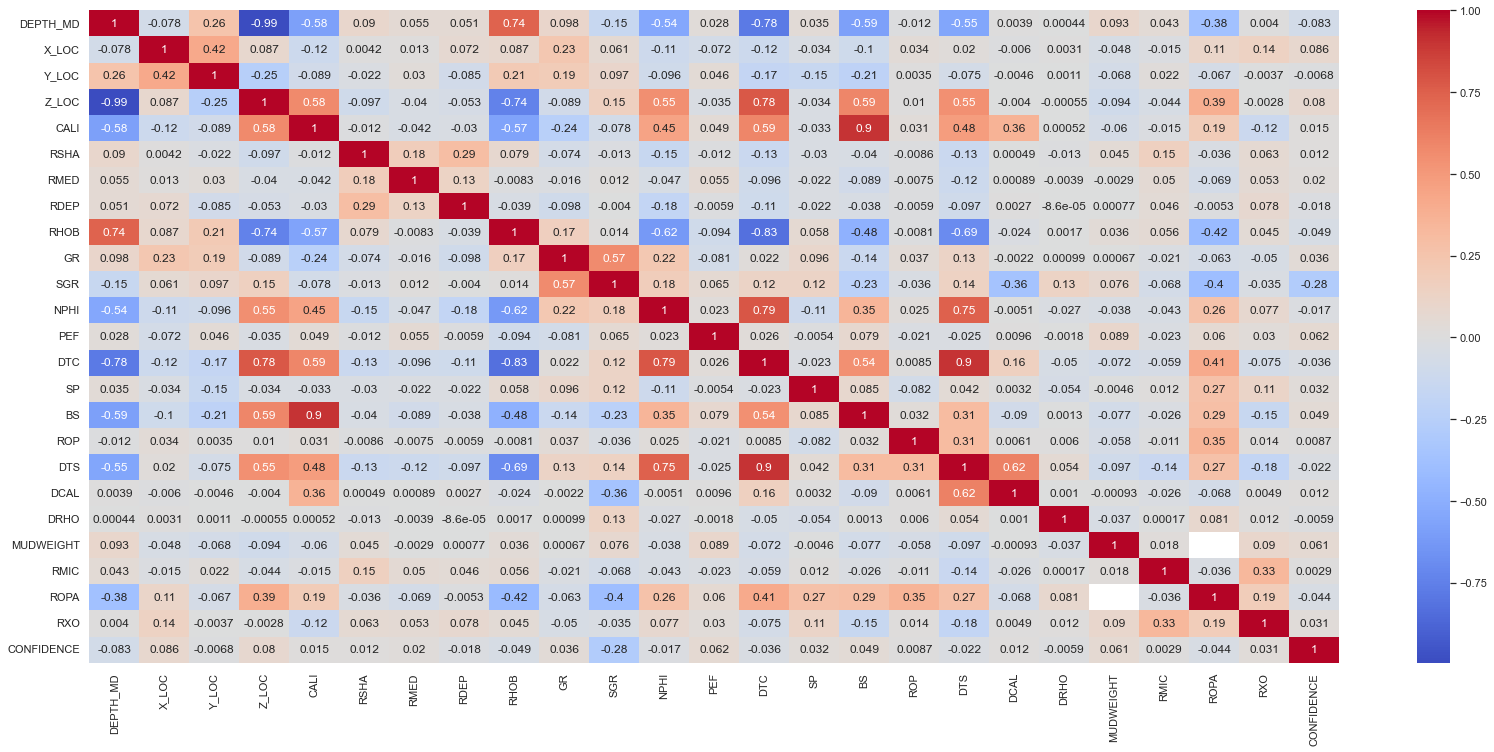

In [9]:
plt.figure(figsize=(28,12))
sns.set_theme(style="white")
corr = data.corr()
heatmap = sns.heatmap(corr, cmap="coolwarm", annot=True)

In [10]:
correlacion = data.corr()
correlacion.to_csv('correlacion.csv')

In [11]:
#data = data.drop(['Z_LOC', 'BS', 'DTS','MUDWEIGHT','ROP','ROPA','WELL','FORMATION'], axis=1)
data = data.drop(['Z_LOC', 'BS', 'DTS','MUDWEIGHT','ROP','ROPA','FORMATION'], axis=1)

<AxesSubplot:>

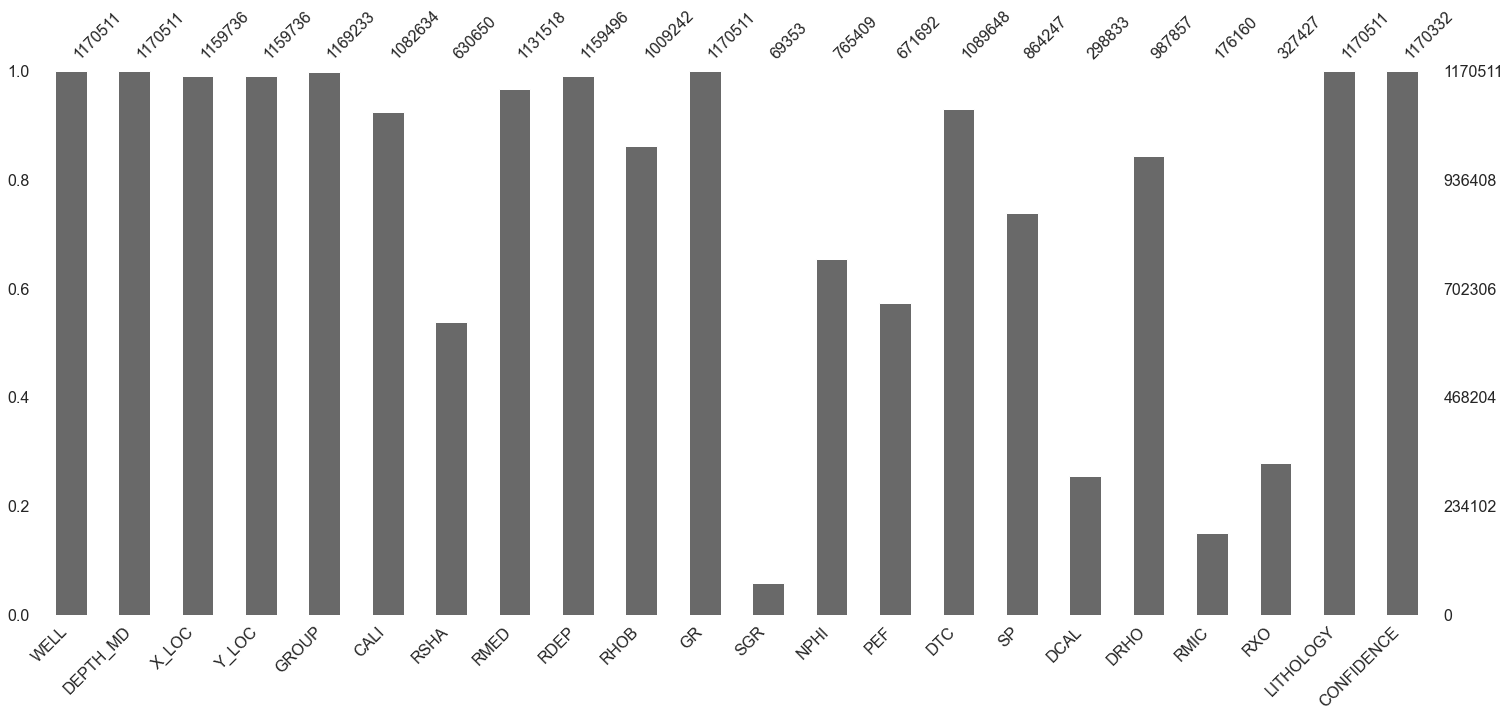

In [12]:
missingno.bar(data)

<AxesSubplot:>

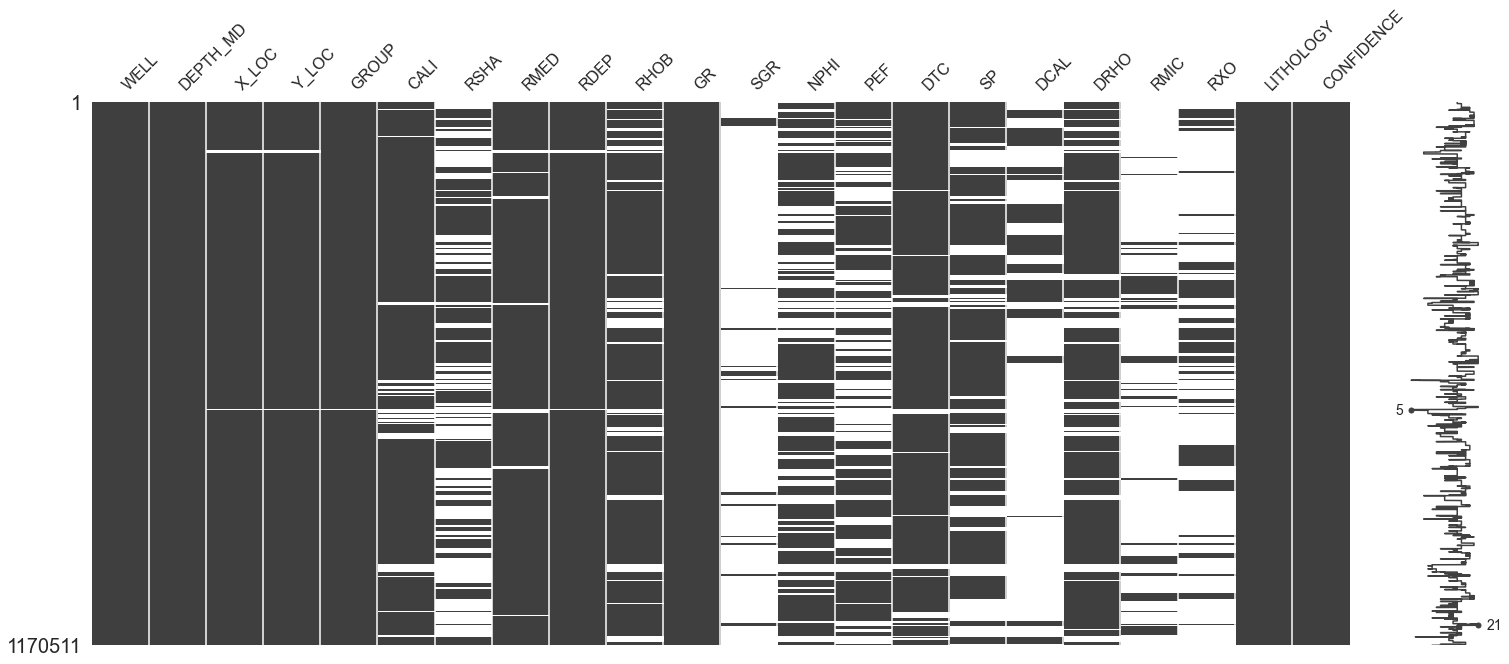

In [13]:
missingno.matrix(data)

In [14]:
data['GROUP'].value_counts()

HORDALAND GP.       293155
SHETLAND GP.        234028
VIKING GP.          131999
ROGALAND GP.        131944
DUNLIN GP.          119085
NORDLAND GP.        111490
CROMER KNOLL GP.     52320
BAAT GP.             35823
VESTLAND GP.         26116
HEGRE GP.            13913
ZECHSTEIN GP.        12238
BOKNFJORD GP.         3125
ROTLIEGENDES GP.      2792
TYNE GP.              1205
Name: GROUP, dtype: int64

<Figure size 2016x864 with 0 Axes>

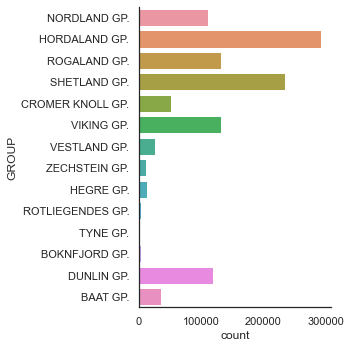

In [15]:
plt.figure(figsize=(28,12))
sns.catplot(y = "GROUP", data = data, kind = "count")

In [16]:
data['LITHOLOGY'].value_counts()

Shale              720803
Sandstone          168937
Sandstone/Shale    150455
Limestone           56320
Marl                33329
Tuff                15245
Chalk               10513
Halite               8213
Coal                 3820
Dolomite             1688
Anhydrite            1085
Basement              103
Name: LITHOLOGY, dtype: int64

<AxesSubplot:>

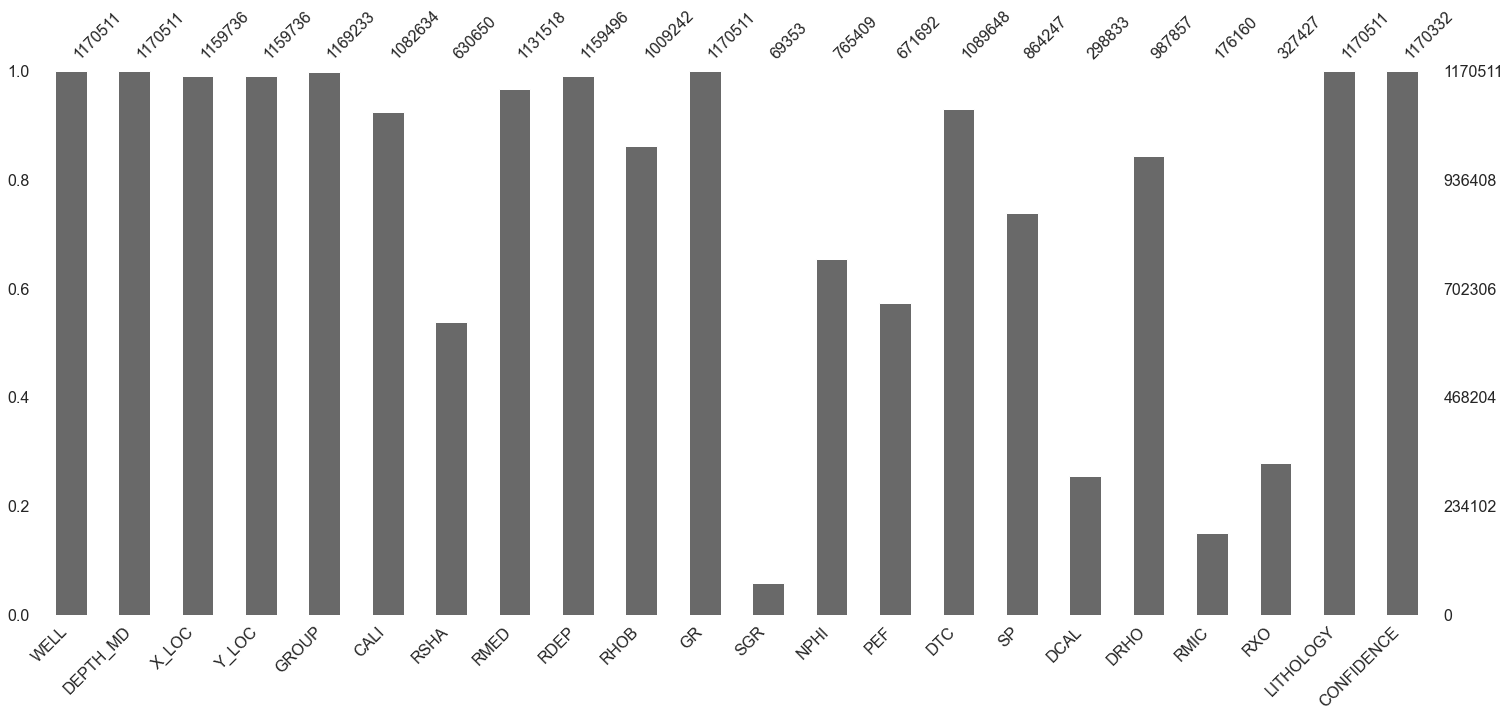

In [17]:
missingno.bar(data)

<AxesSubplot:>

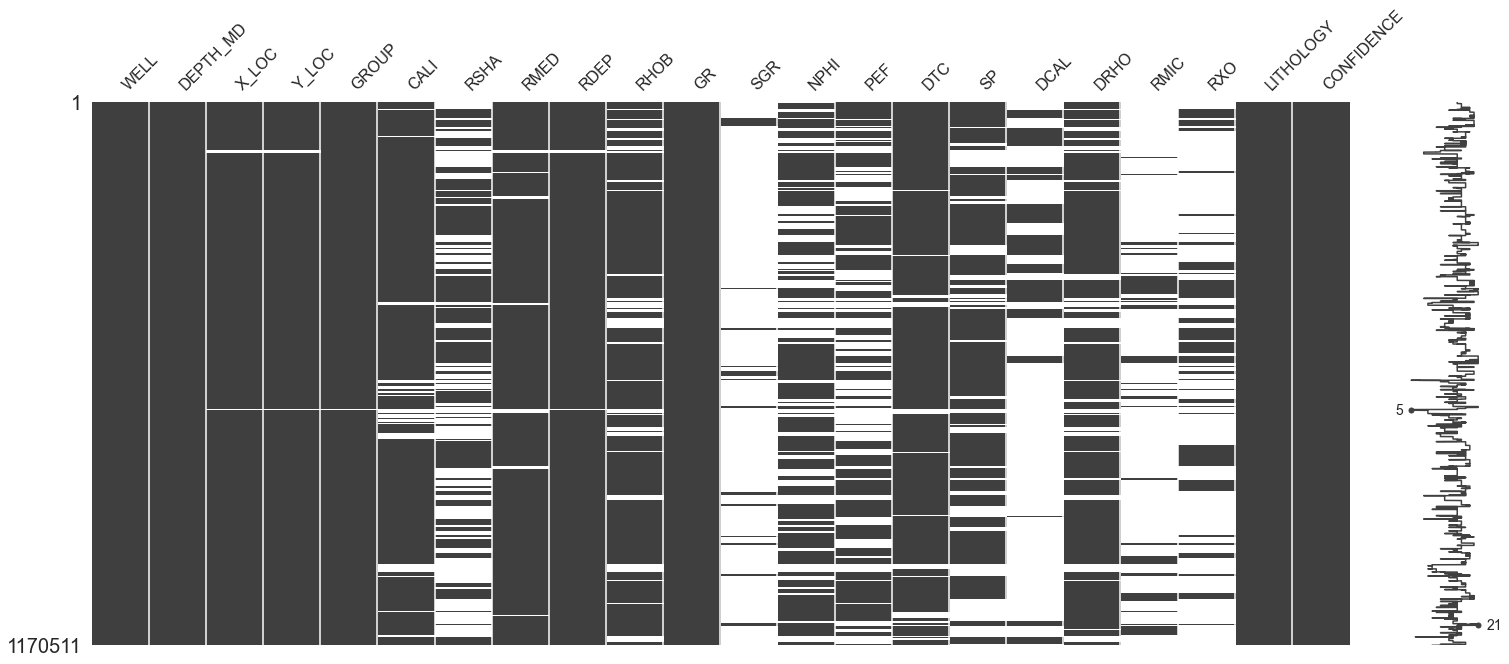

In [18]:
missingno.matrix(data)

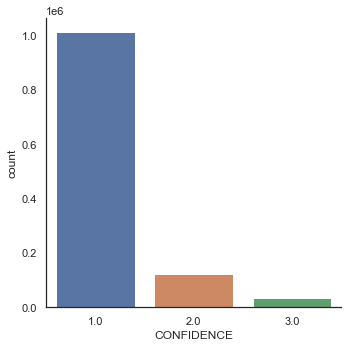

In [19]:
sns.catplot(x = "CONFIDENCE", data = data, kind = "count")

In [20]:
data = data.loc[data['CONFIDENCE'] == 1]

In [21]:
data = data.drop(['CONFIDENCE'], axis=1)

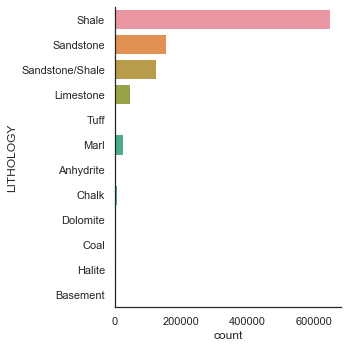

In [22]:
sns.catplot(y = "LITHOLOGY", data = data, kind = "count")

In [23]:
data['LITHOLOGY'].value_counts()

Shale              648843
Sandstone          154292
Sandstone/Shale    123186
Limestone           45585
Marl                25521
Chalk                6667
Halite               4167
Coal                 3316
Dolomite             1115
Anhydrite             878
Basement               89
Tuff                   46
Name: LITHOLOGY, dtype: int64

<AxesSubplot:>

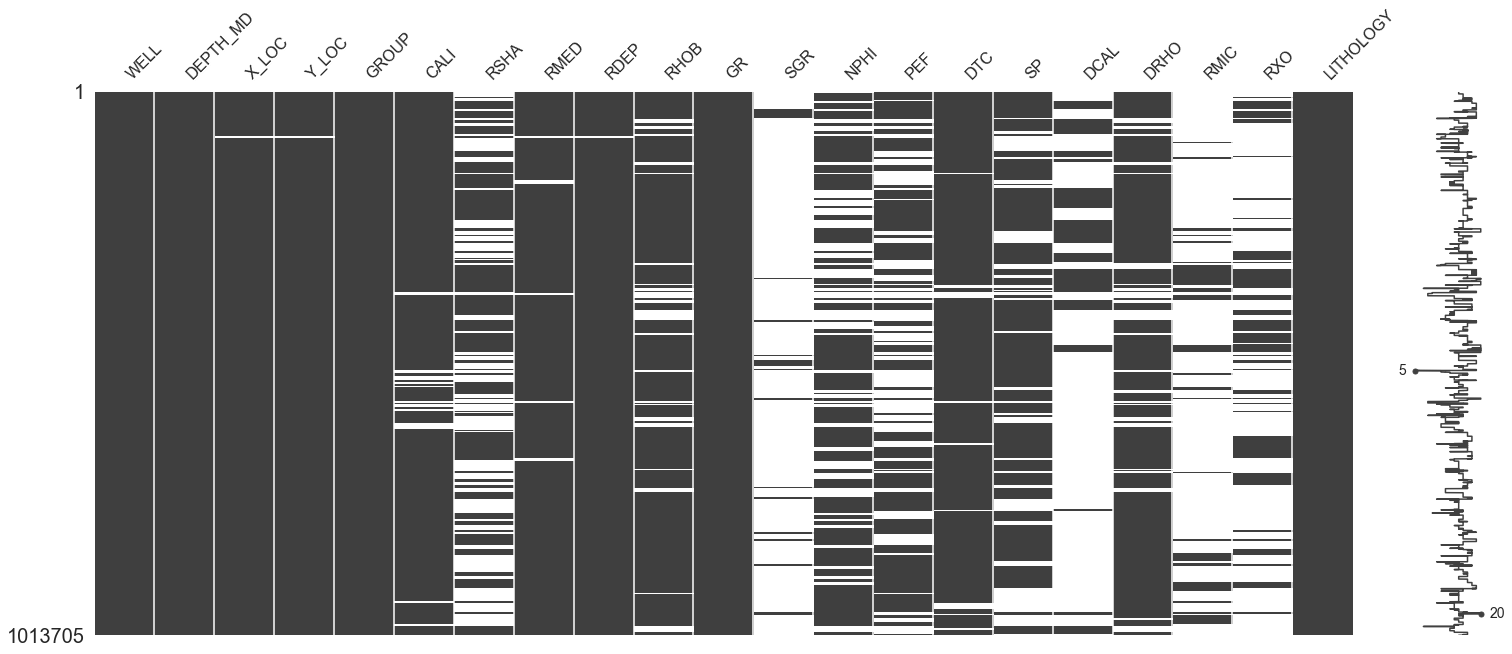

In [24]:
missingno.matrix(data)

In [25]:
data = data.drop(['SGR','DCAL','RMIC','RXO'], axis=1)

<AxesSubplot:>

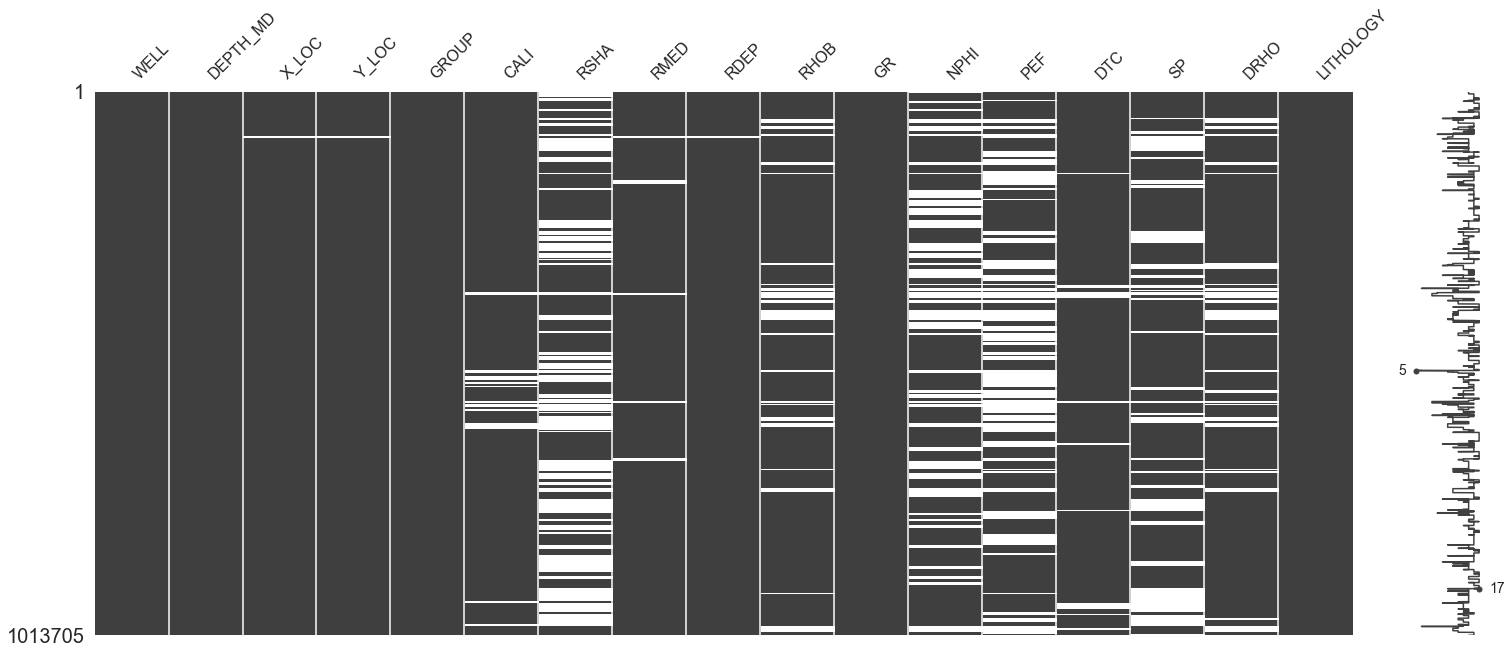

In [26]:
missingno.matrix(data)

In [27]:
data['LITHOLOGY'].value_counts()

Shale              648843
Sandstone          154292
Sandstone/Shale    123186
Limestone           45585
Marl                25521
Chalk                6667
Halite               4167
Coal                 3316
Dolomite             1115
Anhydrite             878
Basement               89
Tuff                   46
Name: LITHOLOGY, dtype: int64

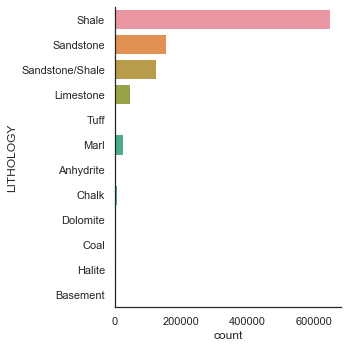

In [28]:
sns.catplot(y = "LITHOLOGY", data = data, kind = "count")

# REEMPLAZAR DATOS CON LA MEDIA

In [29]:
# Mean Imputation
from sklearn.impute import SimpleImputer

df_mean = data.copy()
mean_imputer = SimpleImputer(strategy='mean')
df_mean['PEF'] = mean_imputer.fit_transform(df_mean['PEF'].values.reshape(-1,1))
df_mean['RMED'] = mean_imputer.fit_transform(df_mean['RMED'].values.reshape(-1,1))
df_mean['SP'] = mean_imputer.fit_transform(df_mean['SP'].values.reshape(-1,1))
df_mean['RSHA'] = mean_imputer.fit_transform(df_mean['RSHA'].values.reshape(-1,1))

<AxesSubplot:>

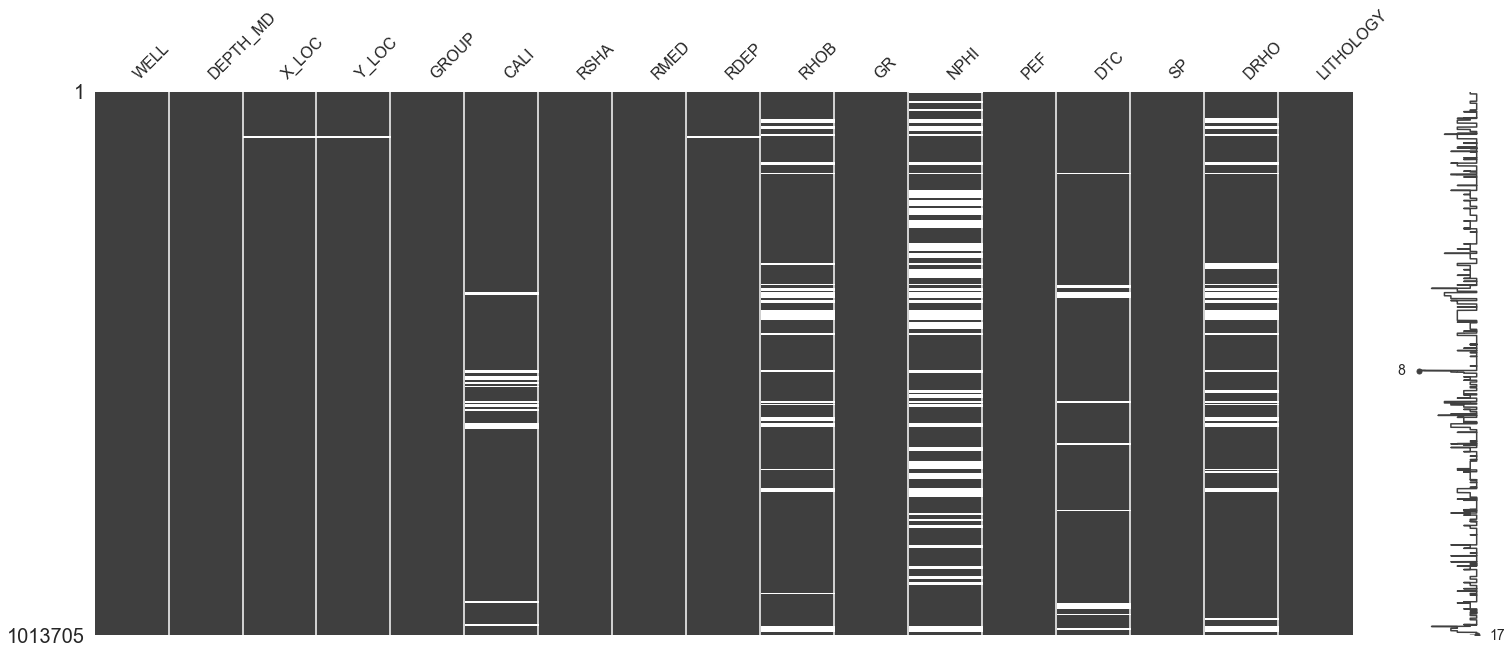

In [30]:
missingno.matrix(df_mean)

# Outliers

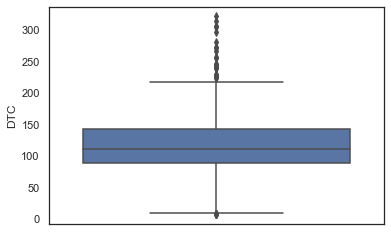

In [31]:
sns.boxplot( y=df_mean["DTC"] )
plt.show()

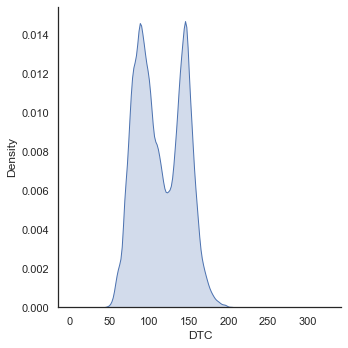

In [32]:
sns.displot(df_mean, x="DTC", kind='kde', fill=True)

In [33]:
df_mean = df_mean.drop(df_mean[df_mean['DTC']> 200].index)
df_mean = df_mean.drop(df_mean[df_mean['DTC']< 50].index)

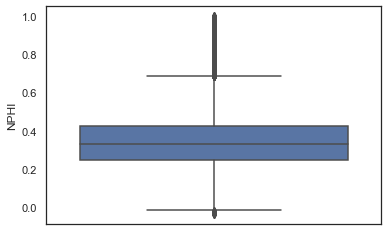

In [34]:
sns.boxplot( y=df_mean["NPHI"] )
plt.show()

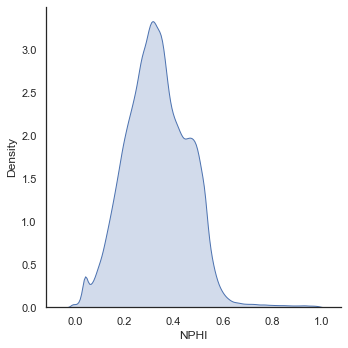

In [35]:
sns.displot(df_mean, x="NPHI", kind='kde', fill=True)

In [36]:
df_mean = df_mean.drop(df_mean[df_mean['NPHI']> 0.8].index)
df_mean = df_mean.drop(df_mean[df_mean['RHOB']< 0].index)

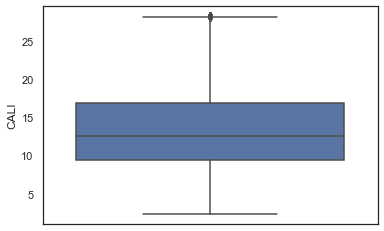

In [37]:
sns.boxplot( y=df_mean["CALI"] )
plt.show()

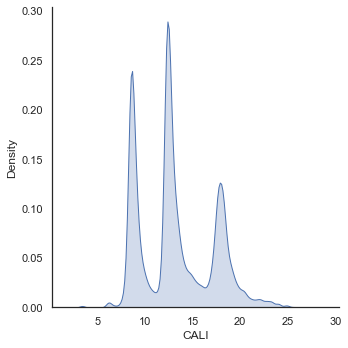

In [38]:
sns.displot(df_mean, x="CALI", kind='kde', fill=True)

In [39]:
df_mean = df_mean.drop(df_mean[df_mean['CALI']> 27].index)

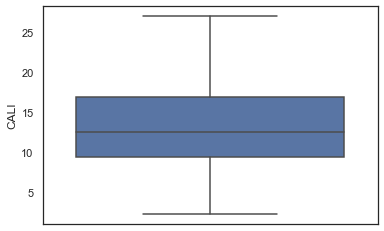

In [40]:
sns.boxplot( y=df_mean["CALI"] );
plt.show()

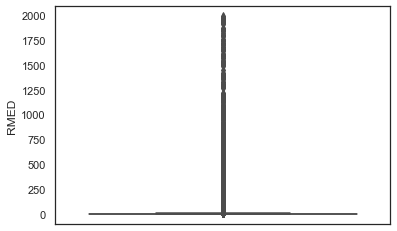

In [41]:
sns.boxplot( y=df_mean["RMED"] )
plt.show()

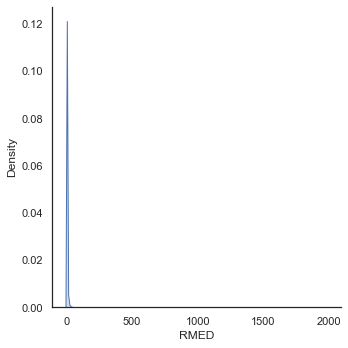

In [42]:
sns.displot(df_mean, x="RMED", kind='kde', fill=True)

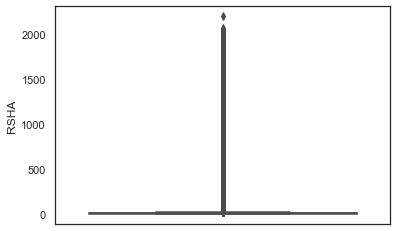

In [43]:
sns.boxplot( y=df_mean["RSHA"] )
plt.show()

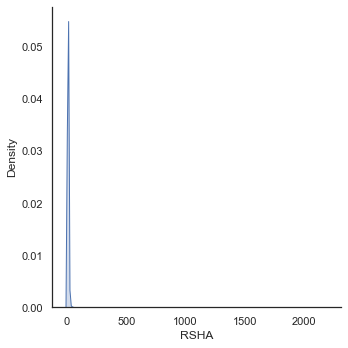

In [44]:
sns.displot(df_mean, x="RSHA", kind='kde', fill=True)

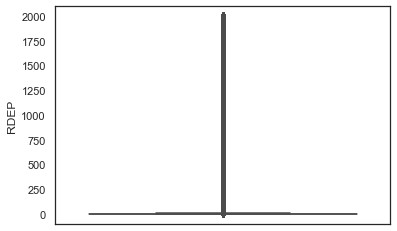

In [45]:
sns.boxplot( y=df_mean["RDEP"] )
plt.show()

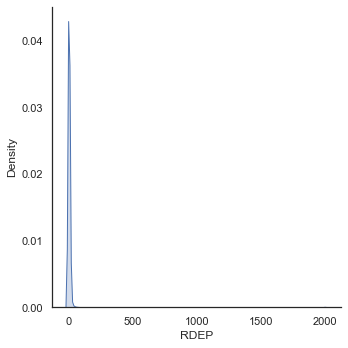

In [46]:
sns.displot(df_mean, x="RDEP", kind='kde', fill=True)

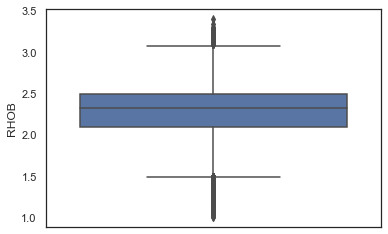

In [47]:
sns.boxplot( y=df_mean["RHOB"] );
plt.show()

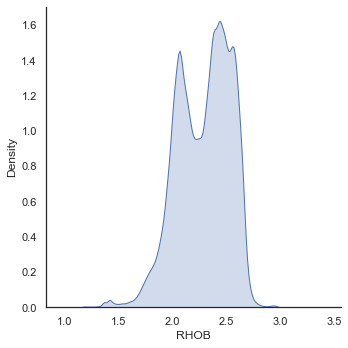

In [48]:
sns.displot(df_mean, x="RHOB", kind='kde', fill=True)

In [49]:
df_mean = df_mean.drop(df_mean[df_mean['RHOB']> 3].index)
df_mean = df_mean.drop(df_mean[df_mean['RHOB']< 1.5].index)

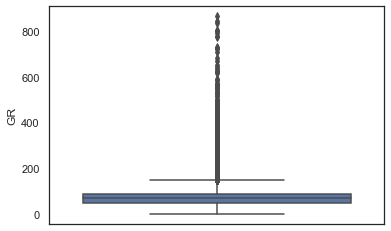

In [50]:
sns.boxplot( y=df_mean["GR"] )
plt.show()

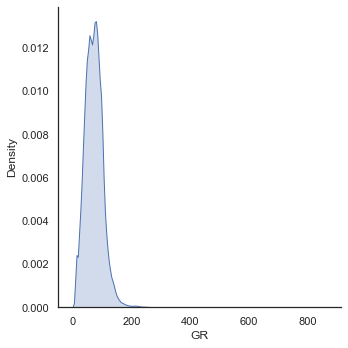

In [51]:
sns.displot(df_mean, x="GR", kind='kde', fill=True)

In [52]:
df_mean = df_mean.drop(df_mean[df_mean['GR']> 200].index)

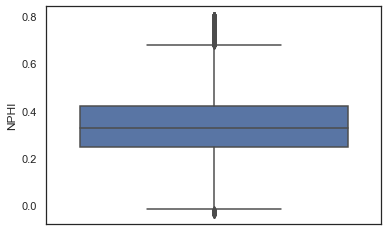

In [53]:
sns.boxplot( y=df_mean["NPHI"] )
plt.show()

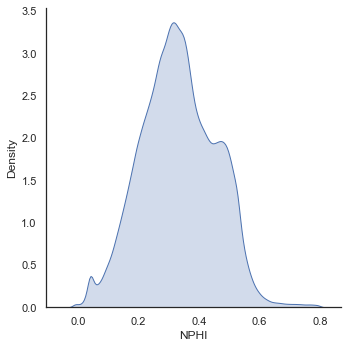

In [54]:
sns.displot(df_mean, x="NPHI", kind='kde', fill=True)

In [55]:
df_mean = df_mean.drop(df_mean[df_mean['NPHI']> 0.8].index)
df_mean = df_mean.drop(df_mean[df_mean['NPHI']< 0].index)

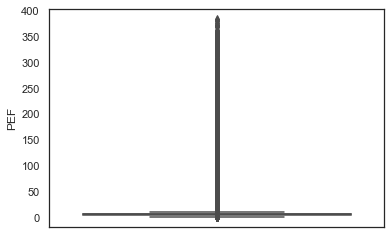

In [56]:
sns.boxplot( y=df_mean["PEF"] );
plt.show()

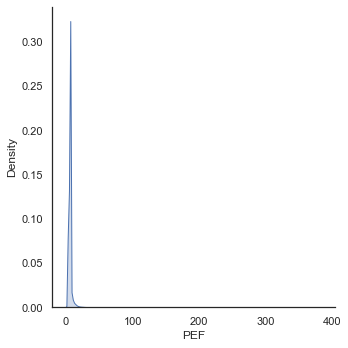

In [57]:
sns.displot(df_mean, x="PEF", kind='kde', fill=True)

In [58]:
df_mean = df_mean.drop(df_mean[df_mean['PEF']> 10].index)

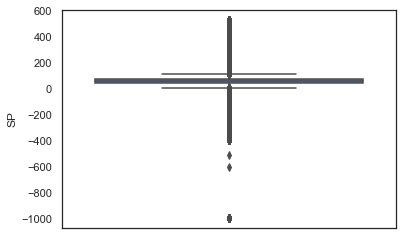

In [59]:
sns.boxplot( y=df_mean["SP"] )
plt.show()

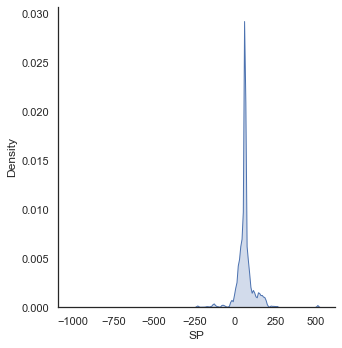

In [60]:
sns.displot(df_mean, x="SP", kind='kde', fill=True)

In [61]:
df_mean = df_mean.drop(df_mean[df_mean['SP']> 200].index)
df_mean = df_mean.drop(df_mean[df_mean['SP']< -200].index)

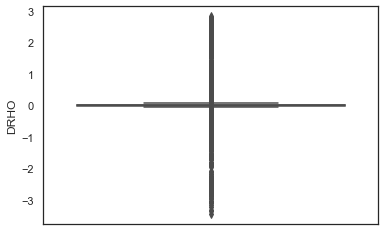

In [62]:
sns.boxplot( y=df_mean["DRHO"] )
plt.show()

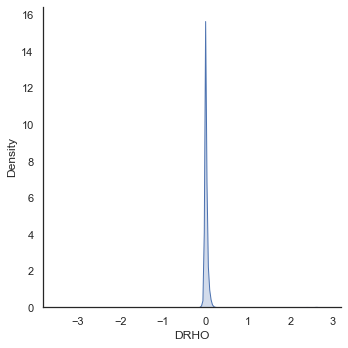

In [63]:
sns.displot(df_mean, x="DRHO", kind='kde', fill=True)

In [64]:
df_mean = df_mean.drop(df_mean[df_mean['DRHO']> 0.25].index)
df_mean = df_mean.drop(df_mean[df_mean['DRHO']< -0.25].index)

<AxesSubplot:>

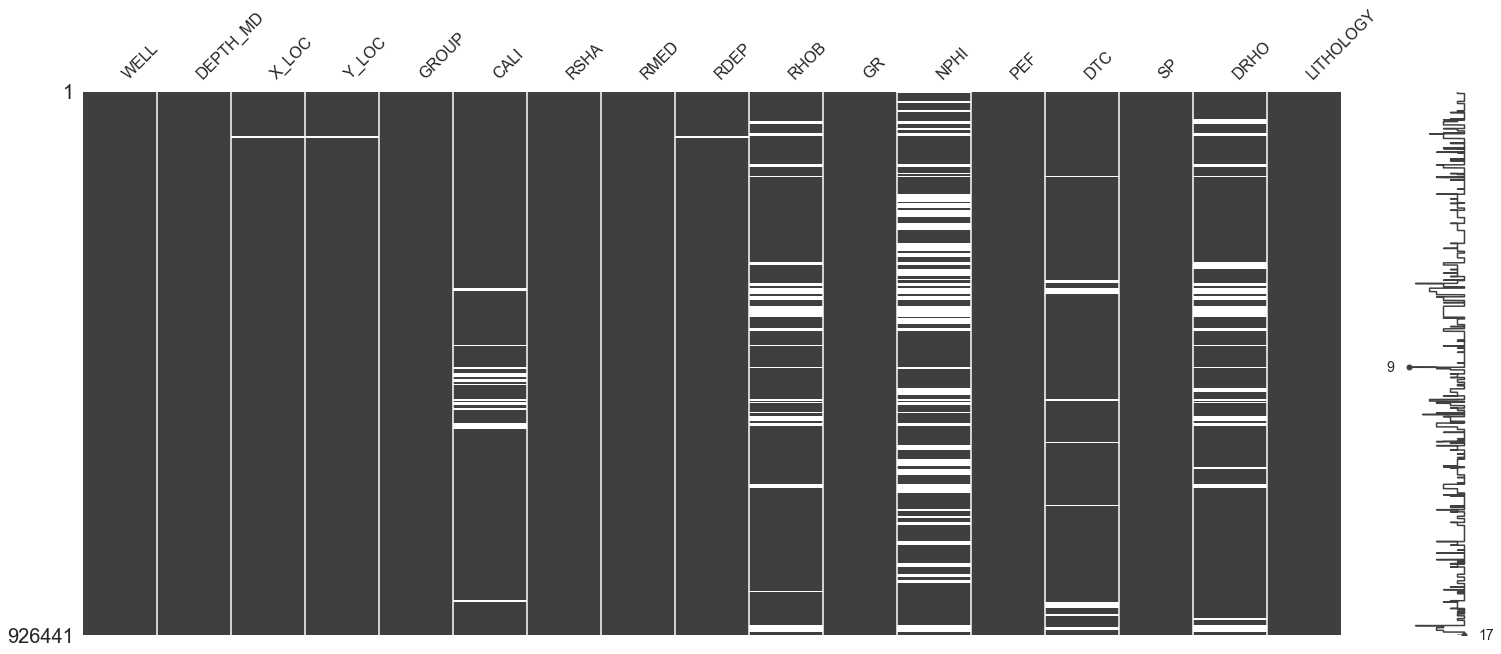

In [65]:
missingno.matrix(df_mean)

In [66]:
df_mean['LITHOLOGY'].value_counts()

Shale              591898
Sandstone          138713
Sandstone/Shale    111678
Limestone           44434
Marl                25087
Chalk                6576
Halite               4164
Coal                 2452
Dolomite             1074
Anhydrite             311
Tuff                   46
Basement                8
Name: LITHOLOGY, dtype: int64

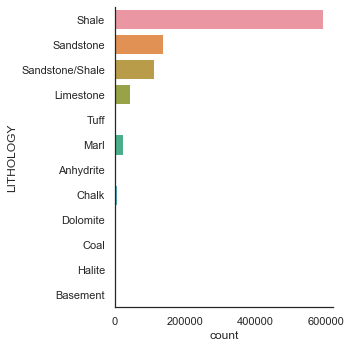

In [67]:
sns.catplot(y = "LITHOLOGY", data = df_mean, kind = "count")

In [68]:
df_mean = df_mean.dropna(inplace=False)

<AxesSubplot:>

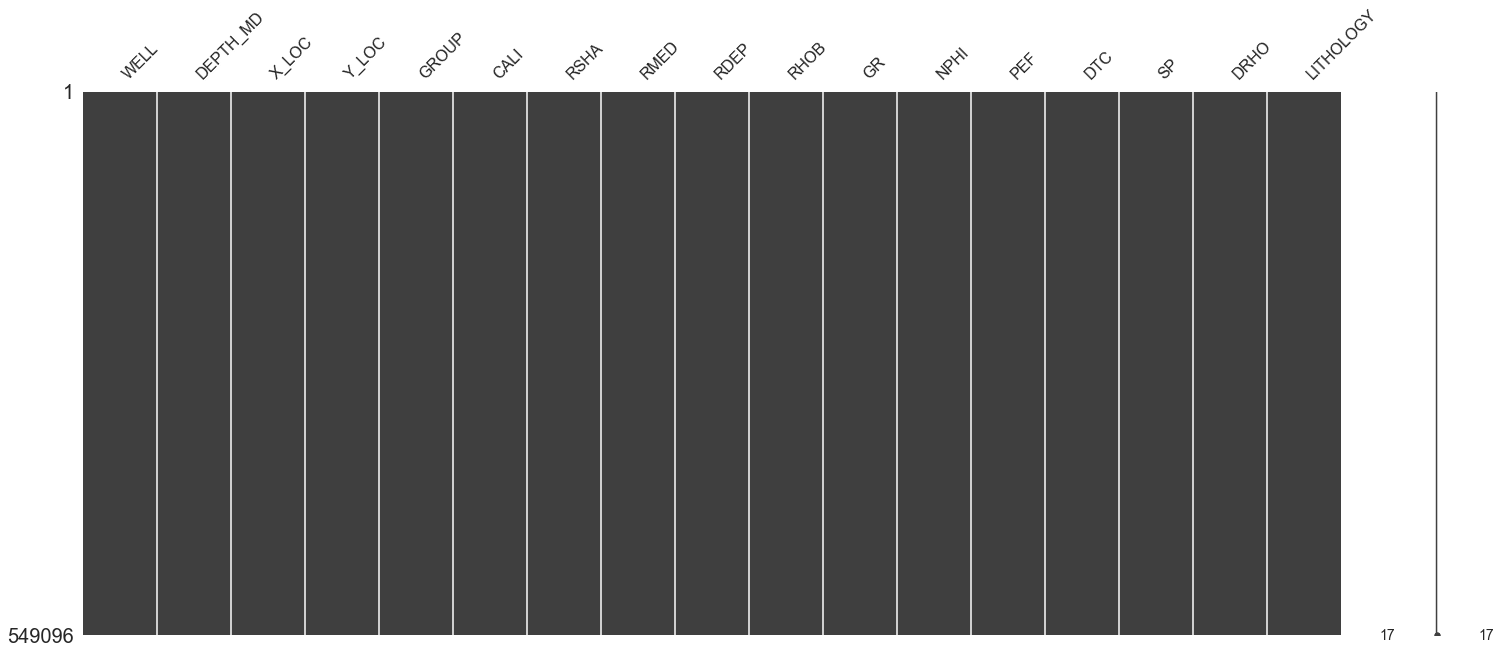

In [69]:
missingno.matrix(df_mean)

In [70]:
df_mean['LITHOLOGY'].value_counts()

Shale              333470
Sandstone           88086
Sandstone/Shale     70383
Limestone           27909
Marl                17183
Chalk                5195
Halite               3866
Coal                 2082
Dolomite              599
Anhydrite             276
Tuff                   39
Basement                8
Name: LITHOLOGY, dtype: int64

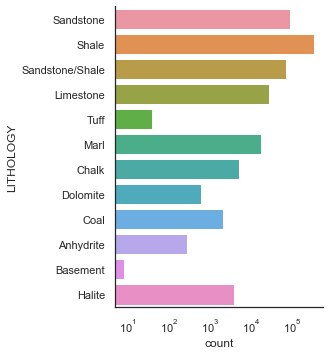

In [71]:
sns.catplot(y = "LITHOLOGY", data = df_mean, kind = "count")
plt.xscale('log')

In [72]:
df_mean['LITHOLOGY'].value_counts()

Shale              333470
Sandstone           88086
Sandstone/Shale     70383
Limestone           27909
Marl                17183
Chalk                5195
Halite               3866
Coal                 2082
Dolomite              599
Anhydrite             276
Tuff                   39
Basement                8
Name: LITHOLOGY, dtype: int64

# DONWSAMPLING 1.0

In [73]:
data_lutita=df_mean[(df_mean.LITHOLOGY == "Shale")].sample(n = 5195, replace = False)
data_arenisca=df_mean[(df_mean.LITHOLOGY == "Sandstone")].sample(n = 5195, replace = False)
data_areniscalutita=df_mean[(df_mean.LITHOLOGY == "Sandstone/Shale")].sample(n = 5195, replace = False)
data_caliza=df_mean[(df_mean.LITHOLOGY == "Limestone")].sample(n = 5195, replace = False)
data_marl=df_mean[(df_mean.LITHOLOGY == "Marl")].sample(n = 5195, replace = False)

In [74]:
data_halite=df_mean[(df_mean.LITHOLOGY == "Halite")]
data_chalk=df_mean[(df_mean.LITHOLOGY == "Chalk")]
data_tuff=df_mean[(df_mean.LITHOLOGY == "Tuff")]
data_coal=df_mean[(df_mean.LITHOLOGY == "Coal")]
data_dolomita=df_mean[(df_mean.LITHOLOGY == "Dolomite")]
data_anhidrita=df_mean[(df_mean.LITHOLOGY == "Anhydrite")]
data_basement=df_mean[(df_mean.LITHOLOGY == "Basement")]

In [75]:
data_down = pd.concat([data_arenisca, data_lutita, data_areniscalutita, data_caliza, data_marl, data_chalk, data_tuff, data_coal, data_dolomita, data_anhidrita, data_basement, data_halite])

In [76]:
data_down['LITHOLOGY'].value_counts()

Sandstone          5195
Shale              5195
Sandstone/Shale    5195
Limestone          5195
Marl               5195
Chalk              5195
Halite             3866
Coal               2082
Dolomite            599
Anhydrite           276
Tuff                 39
Basement              8
Name: LITHOLOGY, dtype: int64

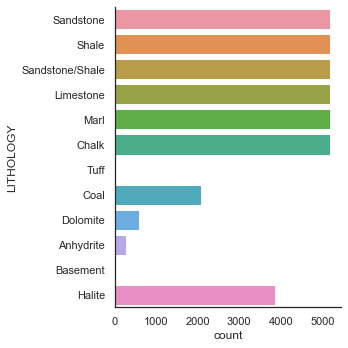

In [77]:
sns.catplot(y = "LITHOLOGY", data = data_down, kind = "count")

<AxesSubplot:>

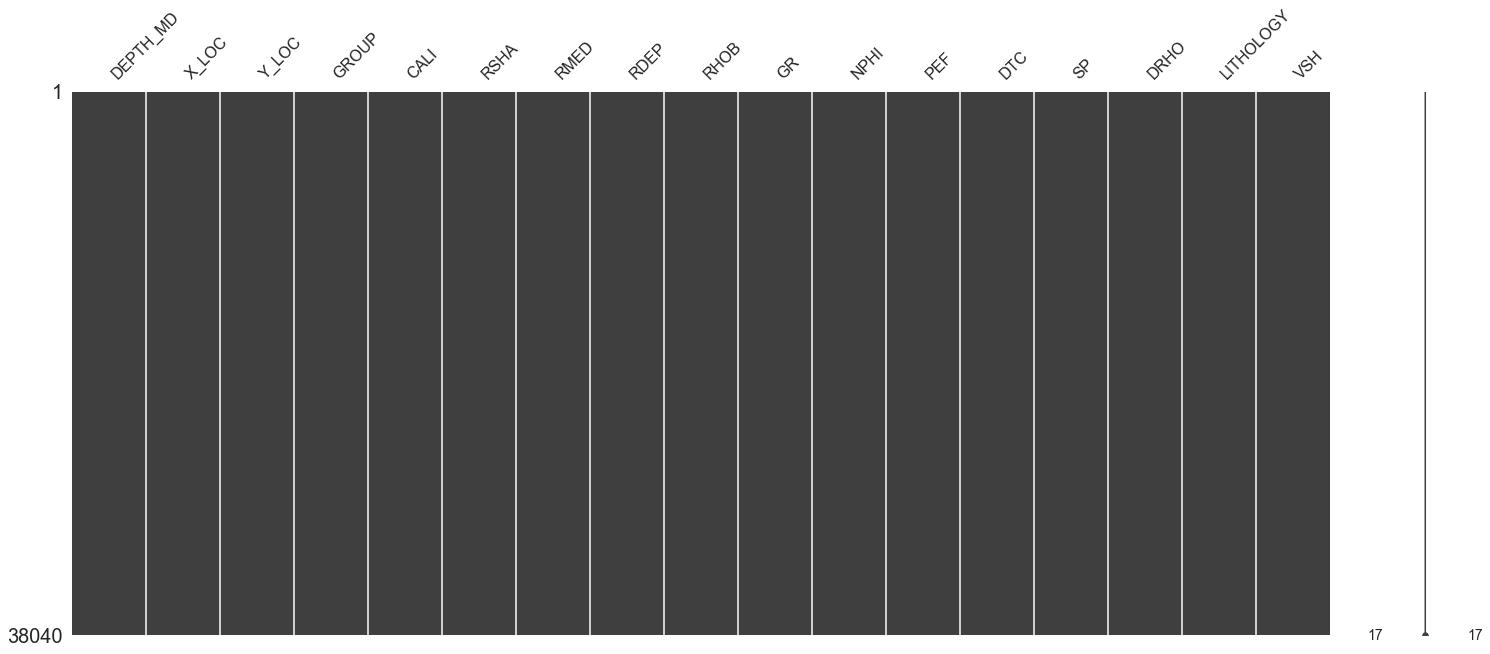

In [101]:
missingno.matrix(data_down)

# VSH

In [80]:
data1 = data_down[['WELL','GR']]
data1.head()

,WELL,GR
922572,34/7-21,78.766212
320996,25/4-5,30.843834
728745,33/9-1,38.775616
582075,31/2-8,39.672600
191006,16/8-1,59.876221


In [81]:
WELLS = []
GRMIN = []
GRMAX = []
for i in data1['WELL']:
    data_well = data1.loc[data1['WELL'] == i]
    grmin = min(data_well['GR'])
    grmax = max(data_well['GR'])
    GRMIN.append(grmin)
    GRMAX.append(grmax)
print(i) 
data_well = data1.loc[data1['WELL'] == i]

17/11-1


In [83]:
data1['GRMIN'] = GRMIN
data1['GRMAX'] = GRMAX

C:\Users\GWISEE~1\AppData\Local\Temp/ipykernel_17644/1689155584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['GRMIN'] = GRMIN
C:\Users\GWISEE~1\AppData\Local\Temp/ipykernel_17644/1689155584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['GRMAX'] = GRMAX


In [84]:
data_down['IGR'] = (data1['GR']-data1['GRMIN'])/(data1['GRMAX']-data1['GRMIN'])

In [85]:
data_down.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,GROUP,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,DRHO,LITHOLOGY,IGR
922572,34/7-21,2724.702000,450313.93750,6795994.0,BAAT GP.,11.581571,0.366497,1.163781,0.918190,2.356852,78.766212,0.205796,9.107889,83.988472,59.014019,-0.018337,Sandstone,0.227167
320996,25/4-5,2621.822805,454469.53125,6603730.0,ROGALAND GP.,18.109400,9.968602,0.797137,0.878440,2.277410,30.843834,0.282925,4.117731,81.420059,59.014019,0.001239,Sandstone,0.146896
728745,33/9-1,2637.138000,437780.34375,6791573.5,BAAT GP.,11.879846,2.809250,1.766732,1.737608,2.205797,38.775616,0.323573,6.058303,103.821838,61.254036,-0.059639,Sandstone,0.220054
582075,31/2-8,1992.700979,526935.68750,6758512.0,VIKING GP.,11.914101,1.580701,0.820026,0.544555,2.150259,39.672600,0.337625,3.794930,104.682312,66.092003,-0.011558,Sandstone,0.181448
191006,16/8-1,2198.375197,466874.18750,6479870.5,VIKING GP.,12.554856,1.318956,1.326310,1.415055,2.440757,59.876221,0.308275,6.058303,94.435440,39.258499,0.024615,Sandstone,0.494322


In [88]:
data_down['VSH'] = data_down['IGR'] / (3 - 2 * data_down['IGR'])

In [90]:
data_down.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,GROUP,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,DRHO,LITHOLOGY,IGR,VSH
922572,34/7-21,2724.702000,450313.93750,6795994.0,BAAT GP.,11.581571,0.366497,1.163781,0.918190,2.356852,78.766212,0.205796,9.107889,83.988472,59.014019,-0.018337,Sandstone,0.227167,0.089237
320996,25/4-5,2621.822805,454469.53125,6603730.0,ROGALAND GP.,18.109400,9.968602,0.797137,0.878440,2.277410,30.843834,0.282925,4.117731,81.420059,59.014019,0.001239,Sandstone,0.146896,0.054281
728745,33/9-1,2637.138000,437780.34375,6791573.5,BAAT GP.,11.879846,2.809250,1.766732,1.737608,2.205797,38.775616,0.323573,6.058303,103.821838,61.254036,-0.059639,Sandstone,0.220054,0.085962
582075,31/2-8,1992.700979,526935.68750,6758512.0,VIKING GP.,11.914101,1.580701,0.820026,0.544555,2.150259,39.672600,0.337625,3.794930,104.682312,66.092003,-0.011558,Sandstone,0.181448,0.068806
191006,16/8-1,2198.375197,466874.18750,6479870.5,VIKING GP.,12.554856,1.318956,1.326310,1.415055,2.440757,59.876221,0.308275,6.058303,94.435440,39.258499,0.024615,Sandstone,0.494322,0.245766


In [92]:
data_down = data_down.drop(['WELL','IGR'], axis=1)

In [93]:
data_down.head()

,DEPTH_MD,X_LOC,Y_LOC,GROUP,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,DRHO,LITHOLOGY,VSH
922572,2724.702000,450313.93750,6795994.0,BAAT GP.,11.581571,0.366497,1.163781,0.918190,2.356852,78.766212,0.205796,9.107889,83.988472,59.014019,-0.018337,Sandstone,0.089237
320996,2621.822805,454469.53125,6603730.0,ROGALAND GP.,18.109400,9.968602,0.797137,0.878440,2.277410,30.843834,0.282925,4.117731,81.420059,59.014019,0.001239,Sandstone,0.054281
728745,2637.138000,437780.34375,6791573.5,BAAT GP.,11.879846,2.809250,1.766732,1.737608,2.205797,38.775616,0.323573,6.058303,103.821838,61.254036,-0.059639,Sandstone,0.085962
582075,1992.700979,526935.68750,6758512.0,VIKING GP.,11.914101,1.580701,0.820026,0.544555,2.150259,39.672600,0.337625,3.794930,104.682312,66.092003,-0.011558,Sandstone,0.068806
191006,2198.375197,466874.18750,6479870.5,VIKING GP.,12.554856,1.318956,1.326310,1.415055,2.440757,59.876221,0.308275,6.058303,94.435440,39.258499,0.024615,Sandstone,0.245766


In [112]:
data_down.to_csv('EDA_1.csv')

# CLUSTERING

<AxesSubplot:xlabel='X_LOC', ylabel='Y_LOC'>

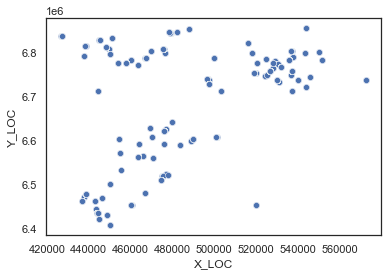

In [94]:
sns.scatterplot(x = "X_LOC", y = "Y_LOC", data = data_down)

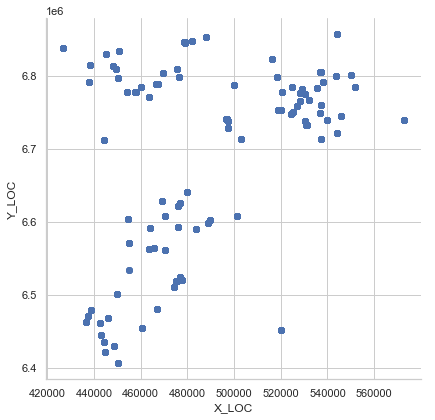

In [95]:
import seaborn as sns
sns.set_style("whitegrid")
sns.FacetGrid(data_down,
              height = 6).map(plt.scatter,
                              'X_LOC',
                              'Y_LOC').add_legend()

# METODO ELBOW

In [96]:
df_Short = data_down[['X_LOC','Y_LOC']]
df_Short.head()

,X_LOC,Y_LOC
922572,450313.93750,6795994.0
320996,454469.53125,6603730.0
728745,437780.34375,6791573.5
582075,526935.68750,6758512.0
191006,466874.18750,6479870.5


In [97]:
import sklearn.cluster as cluster
K = range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(df_Short)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [104]:
mycenters = pd.DataFrame({'Clusters' : K, 'Valor' : wss})
mycenters

,Clusters,Valor
0,1,8.910671e+14
1,2,1.657086e+14
2,3,7.686311e+13
3,4,5.654932e+13
4,5,3.909122e+13
5,6,2.787518e+13
6,7,2.122817e+13
7,8,1.616040e+13
8,9,1.412096e+13
9,10,1.183462e+13


<AxesSubplot:xlabel='Clusters', ylabel='Valor'>

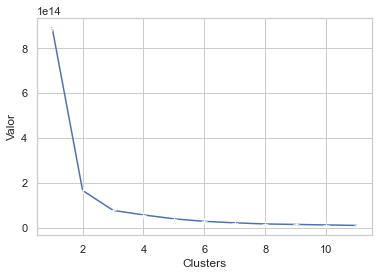

In [110]:
sns.lineplot(x = 'Clusters', y = 'Valor', data = mycenters, marker="+")

In [111]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clusters = cluster.fit_predict(df_Short)
print(clusters)

MemoryError: unable to allocate array data.

In [89]:
data_2 = df_mean.dropna(inplace=False)

In [93]:
data_2.to_csv('data_test.csv')

# FIN

# AQUI

In [112]:
# AQUI

In [59]:
data['FORMATION'].value_counts()

Utsira Fm.               131698
Kyrre Fm.                 78790
Lista Fm.                 52610
Heather Fm.               45165
Skade Fm.                 39496
                          ...  
Flekkefjord Fm.             118
Egersund Fm.                105
Intra Balder Fm. Sst.        20
Kupferschiefer Fm.            6
Mandal Fm.                    5
Name: FORMATION, Length: 68, dtype: int64

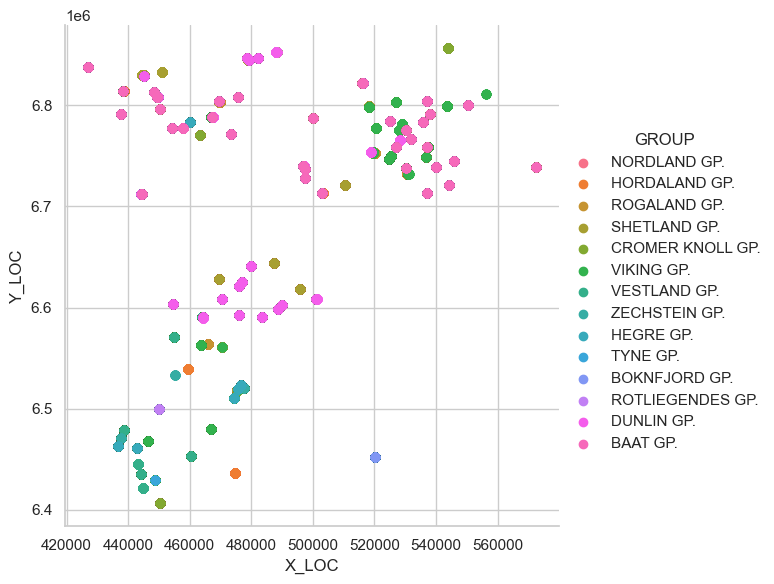

In [61]:
import seaborn as sns
sns.set_style("whitegrid")
sns.FacetGrid(data, hue ="GROUP",
              height = 6).map(plt.scatter,
                              'X_LOC',
                              'Y_LOC').add_legend()

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 867882 entries, 47 to 1170447
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   DEPTH_MD   867882 non-null  float64
 1   X_LOC      864377 non-null  float64
 2   Y_LOC      864377 non-null  float64
 3   GROUP      867882 non-null  object 
 4   FORMATION  755628 non-null  object 
 5   CALI       820075 non-null  float64
 6   RMED       845507 non-null  float64
 7   RDEP       864353 non-null  float64
 8   RHOB       755360 non-null  float64
 9   GR         867882 non-null  float64
 10  NPHI       584057 non-null  float64
 11  PEF        505364 non-null  float64
 12  SP         628242 non-null  float64
 13  DRHO       738414 non-null  float64
 14  LITHOLOGY  867882 non-null  object 
dtypes: float64(12), object(3)
memory usage: 105.9+ MB


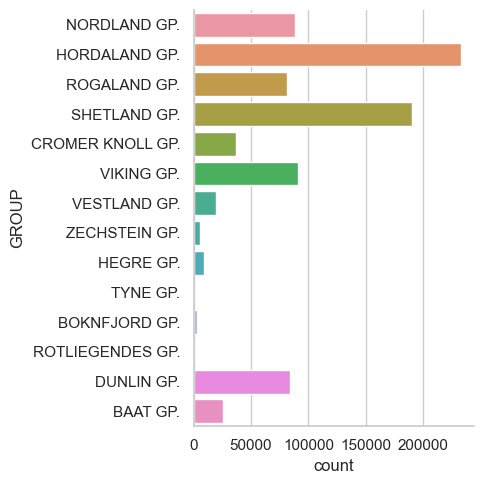

In [63]:
sns.catplot(y = "GROUP", data = data, kind = "count");

<Axes: >

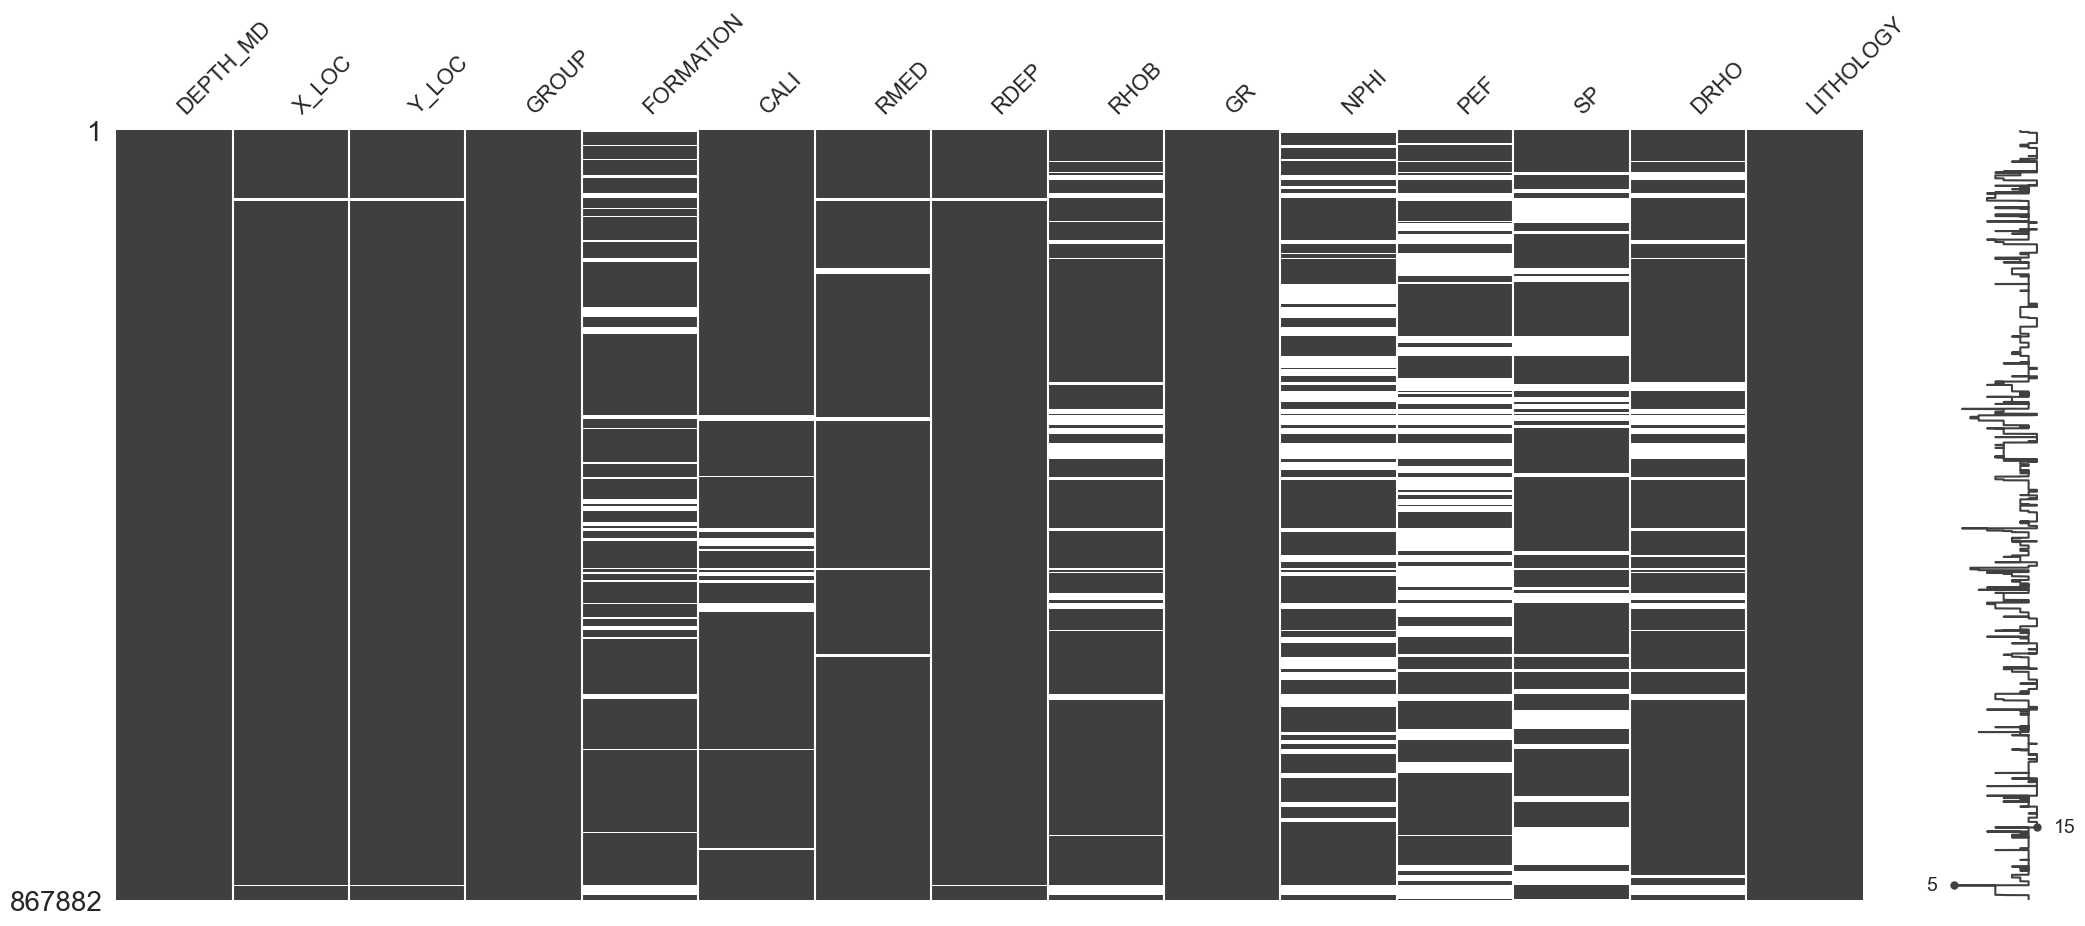

In [64]:
missingno.matrix(data)

In [65]:
data_2 = data.dropna(inplace=True)

In [66]:
data['LITHOLOGY'].value_counts()

Shale              119763
Sandstone           28351
Sandstone/Shale     22124
Limestone           10009
Marl                 4251
Coal                 1056
Chalk                 768
Dolomite              156
Tuff                   35
Name: LITHOLOGY, dtype: int64

# Reducir variables a 5K

In [ ]:
data_lutita=data_2[(data_2.LITHOLOGY == "Shale")].sample(n = 5000, replace = False)
data_arenisca=data_2[(data_2.LITHOLOGY == "Sandstone")].sample(n = 5000, replace = False)
data_areniscalutita=data_2[(data_2.LITHOLOGY == "Sandstone/Shale")].sample(n = 5000, replace = False)
data_caliza=data_2[(data_2.LITHOLOGY == "Limestone")].sample(n = 5000, replace = False)
data_marl=data_2[(data_2.LITHOLOGY == "Marl")].sample(n = 5000, replace = False)

In [35]:
#data_2 = data_1[['Y_LOC','X_LOC','WELL','DEPTH_MD','CALI', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'DTC', 'SP','LITHOLOGY','CONFIDENCE','LITHOLOGY_VALUE','VSH','CLUSTER']]
data_2 = data_1.dropna(inplace=True)

In [444]:
#x = data[['DEPTH_MD','X_LOC','Y_LOC','CALI','RMED','RDEP','RHOB','GR','NPHI','PEF','SP','DRHO']]
x = data[['DEPTH_MD','GR','NPHI']]
#x = data[['GR']]
y = data['LITHOLOGY']

In [445]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# DUMMY TRAIN

In [452]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [453]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9263956952051504


In [454]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

          Chalk       0.80      0.84      0.82       165
           Coal       0.80      0.61      0.69        59
       Dolomite       0.00      0.00      0.00         5
      Limestone       0.92      0.83      0.87      1036
           Marl       0.85      0.71      0.77       154
      Sandstone       0.88      0.90      0.89      1345
Sandstone/Shale       0.75      0.64      0.69       446
          Shale       0.95      0.98      0.96      7044
           Tuff       0.86      0.79      0.83       153

       accuracy                           0.93     10407
      macro avg       0.76      0.70      0.73     10407
   weighted avg       0.92      0.93      0.92     10407



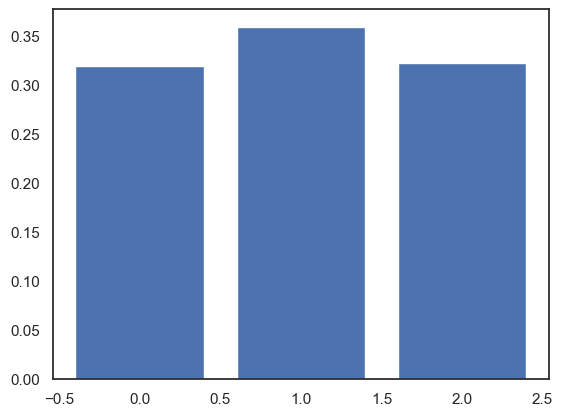

In [455]:
from matplotlib import pyplot
pyplot.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
pyplot.show()

# DUMMY 2.0

In [388]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [389]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train_pca,y_train)

y_pred=clf.predict(x_test_pca)

In [390]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9560872489670414


In [383]:
data['LITHOLOGY'].value_counts()

Shale              35265
Sandstone           6719
Limestone           4967
Sandstone/Shale     2266
Chalk                869
Tuff                 826
Marl                 727
Coal                 359
Dolomite              35
Name: LITHOLOGY, dtype: int64

In [384]:
data['LITHOLOGY'].value_counts()

Shale              35265
Sandstone           6719
Limestone           4967
Sandstone/Shale     2266
Chalk                869
Tuff                 826
Marl                 727
Coal                 359
Dolomite              35
Name: LITHOLOGY, dtype: int64

Categoria "halite" ha desaparecido

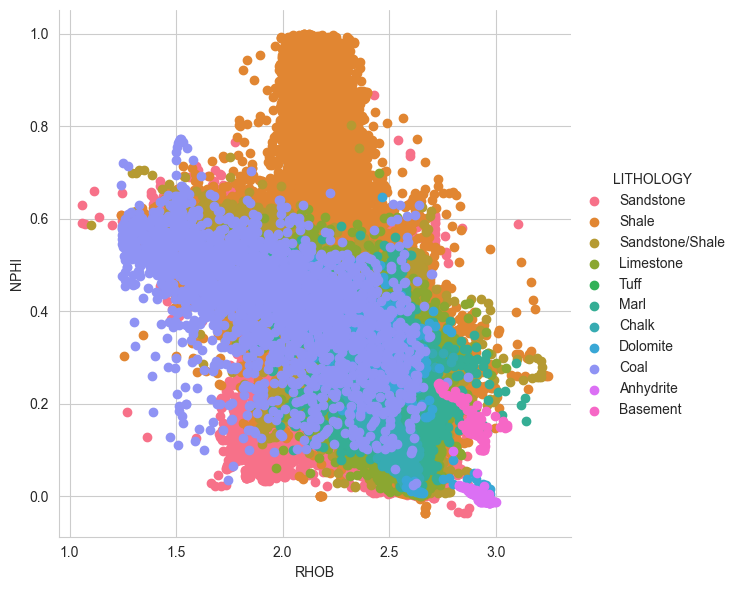

In [201]:
import seaborn as sns
sns.set_style("whitegrid")
sns.FacetGrid(data_2, hue ="LITHOLOGY",
              height = 6).map(plt.scatter,
                              'RHOB',
                              'NPHI').add_legend()

## Clustering

## ESCENARIO 1
Trabajar con todas las clases, reducir a 5k el número de muestras y realizar oversamplig

In [220]:
data_lutita=data_2[(data_2.LITHOLOGY == "Shale")].sample(n = 5000, replace = False)
data_arenisca=data_2[(data_2.LITHOLOGY == "Sandstone")].sample(n = 5000, replace = False)
data_areniscalutita=data_2[(data_2.LITHOLOGY == "Sandstone/Shale")].sample(n = 5000, replace = False)
data_caliza=data_2[(data_2.LITHOLOGY == "Limestone")].sample(n = 5000, replace = False)
data_marl=data_2[(data_2.LITHOLOGY == "Marl")].sample(n = 5000, replace = False)

In [221]:
data_chalk=data_2[(data_2.LITHOLOGY == "Chalk")]
data_hulla=data_2[(data_2.LITHOLOGY == "Coal")]
data_dolomita=data_2[(data_2.LITHOLOGY == "Dolomite")]
data_anhidrita=data_2[(data_2.LITHOLOGY == "Tuff")]
data_toba=data_2[(data_2.LITHOLOGY == "Anhydrite")]

In [222]:
data_3 = pd.concat([data_arenisca, data_lutita, data_areniscalutita, data_caliza, data_marl, data_chalk, data_hulla, data_dolomita, data_anhidrita, data_toba])

In [223]:
data_3.sort_values(by=['WELL'])

,Y_LOC,X_LOC,WELL,DEPTH_MD,CALI,RMED,RDEP,RHOB,GR,NPHI,DTC,SP,LITHOLOGY,CONFIDENCE,LITHOLOGY_VALUE,VSH,CLUSTER
14071,6470982.0,437614.12500,15/9-13,2633.9280,12.624352,3.674058,3.726600,2.480659,23.270491,0.151374,68.882668,103.674774,Limestone,1.0,5,0.011825,2
15724,6470984.0,437609.18750,15/9-13,2885.1840,8.768209,2.133398,1.937828,2.549263,104.079567,0.312238,86.762238,119.927910,Shale,1.0,2,0.076313,2
7216,6470978.5,437638.31250,15/9-13,1591.3600,13.700768,0.839175,0.807447,2.032634,72.825005,0.469988,146.800873,59.269009,Shale,1.0,2,0.049533,2
14094,6470982.0,437614.09375,15/9-13,2637.4240,12.852469,6.069348,5.458163,2.540200,17.759336,0.137638,64.967361,102.247238,Limestone,1.0,5,0.007948,2
13057,6470981.5,437616.50000,15/9-13,2479.8000,12.234400,9.059828,7.320360,2.590006,12.227232,0.120261,58.764790,80.402771,Limestone,1.0,5,0.004116,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165804,6406641.0,450381.62500,7/1-1,2397.5608,14.339002,1.473969,1.646373,2.528482,11.105656,0.060454,70.885124,20.883463,Chalk,1.0,6,0.020894,2
1165805,6406641.0,450381.62500,7/1-1,2397.7128,14.364640,1.467400,1.586910,2.513220,11.002990,0.071147,73.091537,20.454905,Chalk,1.0,6,0.020364,2
1165806,6406641.0,450381.62500,7/1-1,2397.8648,14.390127,1.450807,1.527554,2.498103,10.901306,0.081811,75.291733,20.026796,Chalk,1.0,6,0.019839,2
1165794,6406641.0,450381.65625,7/1-1,2396.0408,14.009990,1.547431,1.733273,2.548079,11.075615,0.062219,71.703926,17.925758,Chalk,1.0,6,0.020739,2


<Axes: >

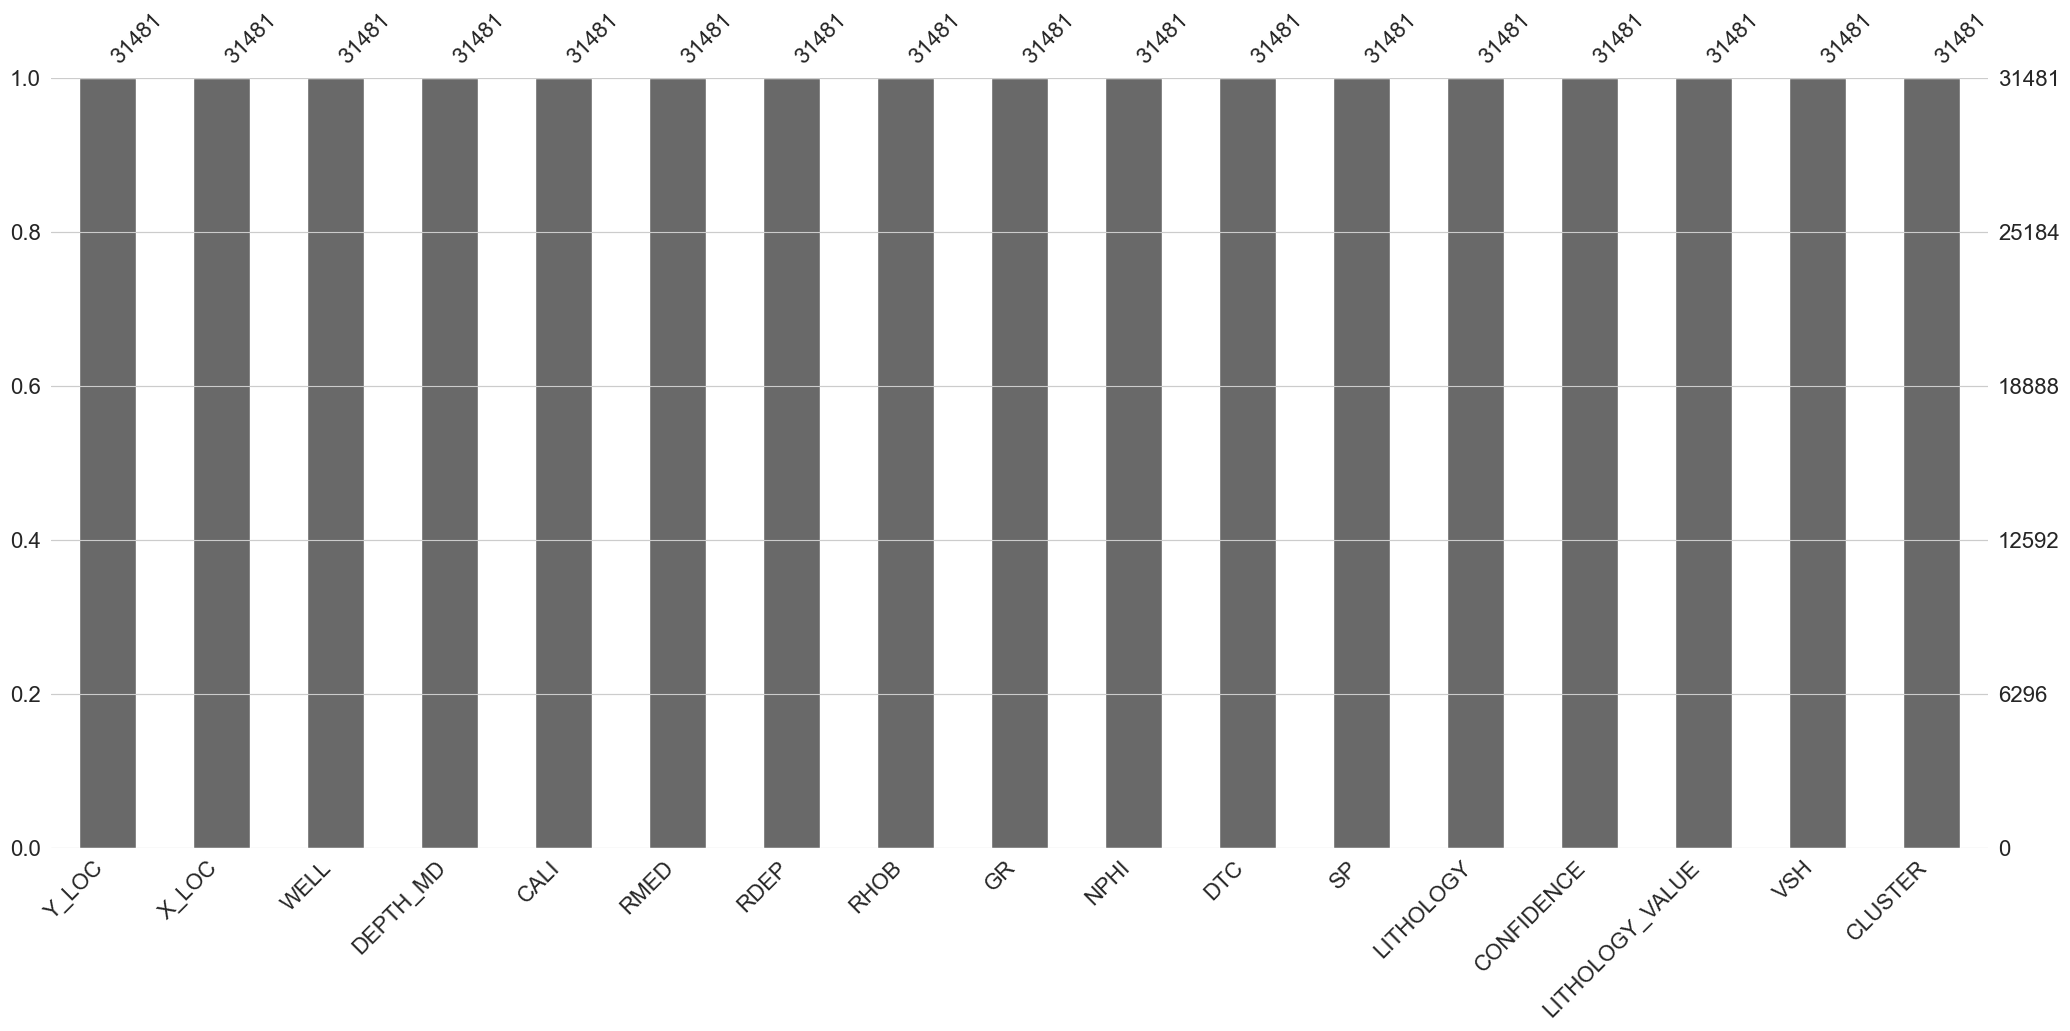

In [224]:
missingno.bar(data_3)

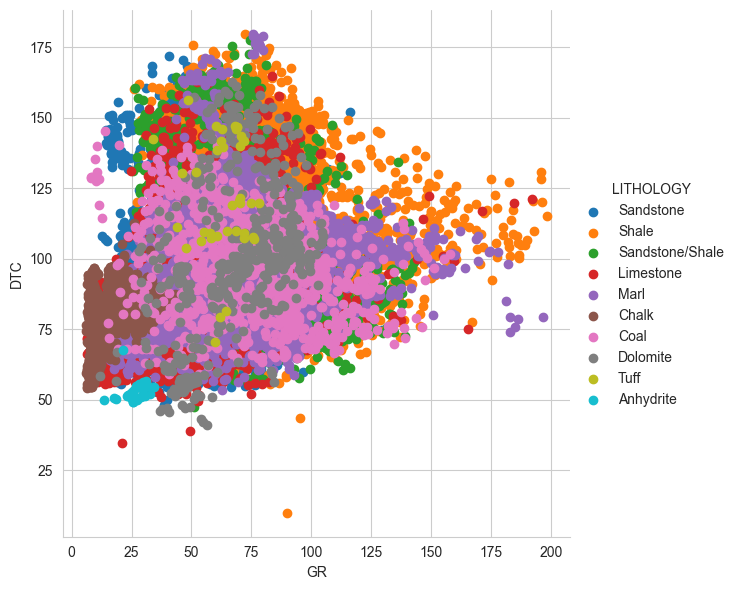

In [225]:
import seaborn as sns
sns.set_style("whitegrid")
sns.FacetGrid(data_3, hue ="LITHOLOGY",
              height = 6).map(plt.scatter,
                              'GR',
                              'DTC').add_legend()

In [226]:
data_3['LITHOLOGY'].value_counts()

Sandstone          5000
Shale              5000
Sandstone/Shale    5000
Limestone          5000
Marl               5000
Chalk              4922
Coal                996
Dolomite            494
Tuff                 39
Anhydrite            30
Name: LITHOLOGY, dtype: int64

SMOTE

In [227]:
from imblearn.over_sampling import SMOTE
from collections import Counter
x = data_3[['Y_LOC','X_LOC','DEPTH_MD', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'DTC', 'SP']]
y = data_3['LITHOLOGY']
counter = Counter(y)
smt = SMOTE()
x_sm, y_sm = smt.fit_resample(x,y)
counter1 = Counter(y_sm)
print(counter1)

Counter({'Sandstone': 5000, 'Shale': 5000, 'Sandstone/Shale': 5000, 'Limestone': 5000, 'Marl': 5000, 'Chalk': 5000, 'Coal': 5000, 'Dolomite': 5000, 'Tuff': 5000, 'Anhydrite': 5000})


In [228]:
data_escenario2 = pd.concat([x_sm, y_sm], axis=1)
data_escenario2.head()

,Y_LOC,X_LOC,DEPTH_MD,RMED,RDEP,RHOB,GR,NPHI,DTC,SP,LITHOLOGY
0,6738652.5,540001.00000,1761.053000,0.914505,0.658469,2.247051,55.960781,0.217924,94.289001,132.765915,Sandstone
1,6570991.0,454904.34375,4198.944000,8.742172,7.632111,2.538537,45.689552,0.152980,81.342453,140.221130,Sandstone
2,6478966.0,438597.03125,2463.021998,0.519616,0.447319,2.158200,31.003292,0.285446,102.194832,33.532612,Sandstone
3,6570991.5,454934.21875,4449.288000,7.410629,7.600919,2.729214,47.738213,0.194607,71.942795,157.592346,Sandstone
4,6758506.5,526929.31250,2554.188980,0.962936,0.735934,2.275639,52.501270,0.270675,91.829849,65.395775,Sandstone


In [229]:
data_escenario2['LITHOLOGY'].value_counts()

Sandstone          5000
Shale              5000
Sandstone/Shale    5000
Limestone          5000
Marl               5000
Chalk              5000
Coal               5000
Dolomite           5000
Tuff               5000
Anhydrite          5000
Name: LITHOLOGY, dtype: int64

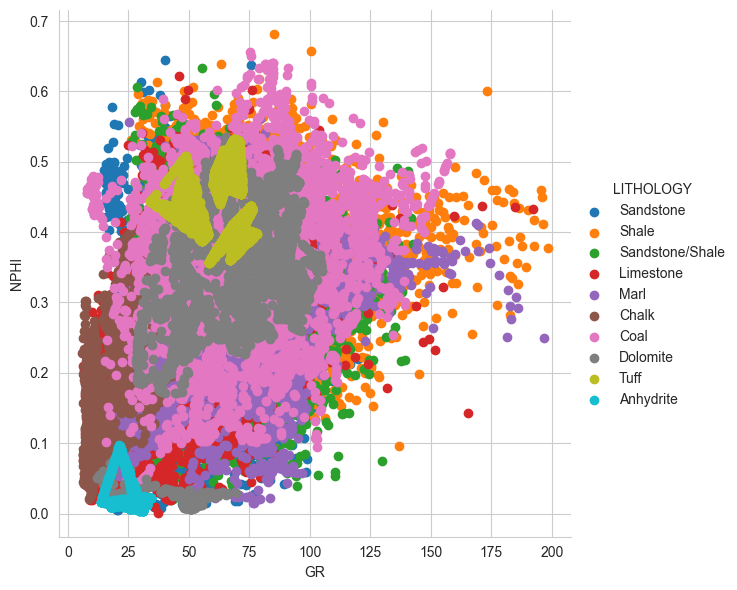

In [230]:
import seaborn as sns
sns.set_style("whitegrid")
sns.FacetGrid(data_escenario2, hue ="LITHOLOGY",
              height = 6).map(plt.scatter,
                              'GR',
                              'NPHI').add_legend()

In [231]:
x1 = data_escenario2[['Y_LOC','X_LOC','DEPTH_MD']]
x1

,Y_LOC,X_LOC,DEPTH_MD
0,6.738652e+06,540001.000000,1761.053000
1,6.570991e+06,454904.343750,4198.944000
2,6.478966e+06,438597.031250,2463.021998
3,6.570992e+06,454934.218750,4449.288000
4,6.758506e+06,526929.312500,2554.188980
...,...,...,...
49995,6.803721e+06,469657.534798,1859.579614
49996,6.463008e+06,436807.187500,2186.009095
49997,6.463008e+06,436807.259433,2172.513418
49998,6.463008e+06,436807.187500,2186.383942


## ESCENARIO 2
Agrupar clases menores a 5k y luego reducir a 5k el número de muestras

In [232]:
data_4 = data_3[['Y_LOC','X_LOC','WELL','DEPTH_MD', 'CALI','RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'DTC', 'SP','LITHOLOGY','CONFIDENCE','LITHOLOGY_VALUE','CLUSTER','VSH']]
data_4['LITHOLOGY'] = data_4['LITHOLOGY'].replace(['Chalk','Coal','Dolomite','Tuff','Anhydrite'], 'otros')

In [233]:
data_4['LITHOLOGY'].value_counts()

otros              6481
Sandstone          5000
Shale              5000
Sandstone/Shale    5000
Limestone          5000
Marl               5000
Name: LITHOLOGY, dtype: int64

In [234]:
data_otros=data_4[(data_4.LITHOLOGY == "otros")].sample(n = 5000, replace = False)

In [235]:
data_4 = pd.concat([data_arenisca, data_lutita, data_areniscalutita, data_caliza, data_marl, data_otros])
data_4['LITHOLOGY_VALUE'].value_counts()

0     5000
2     5000
1     5000
5     5000
3     5000
6     3775
10     767
4      399
9       32
8       27
Name: LITHOLOGY_VALUE, dtype: int64

<Axes: >

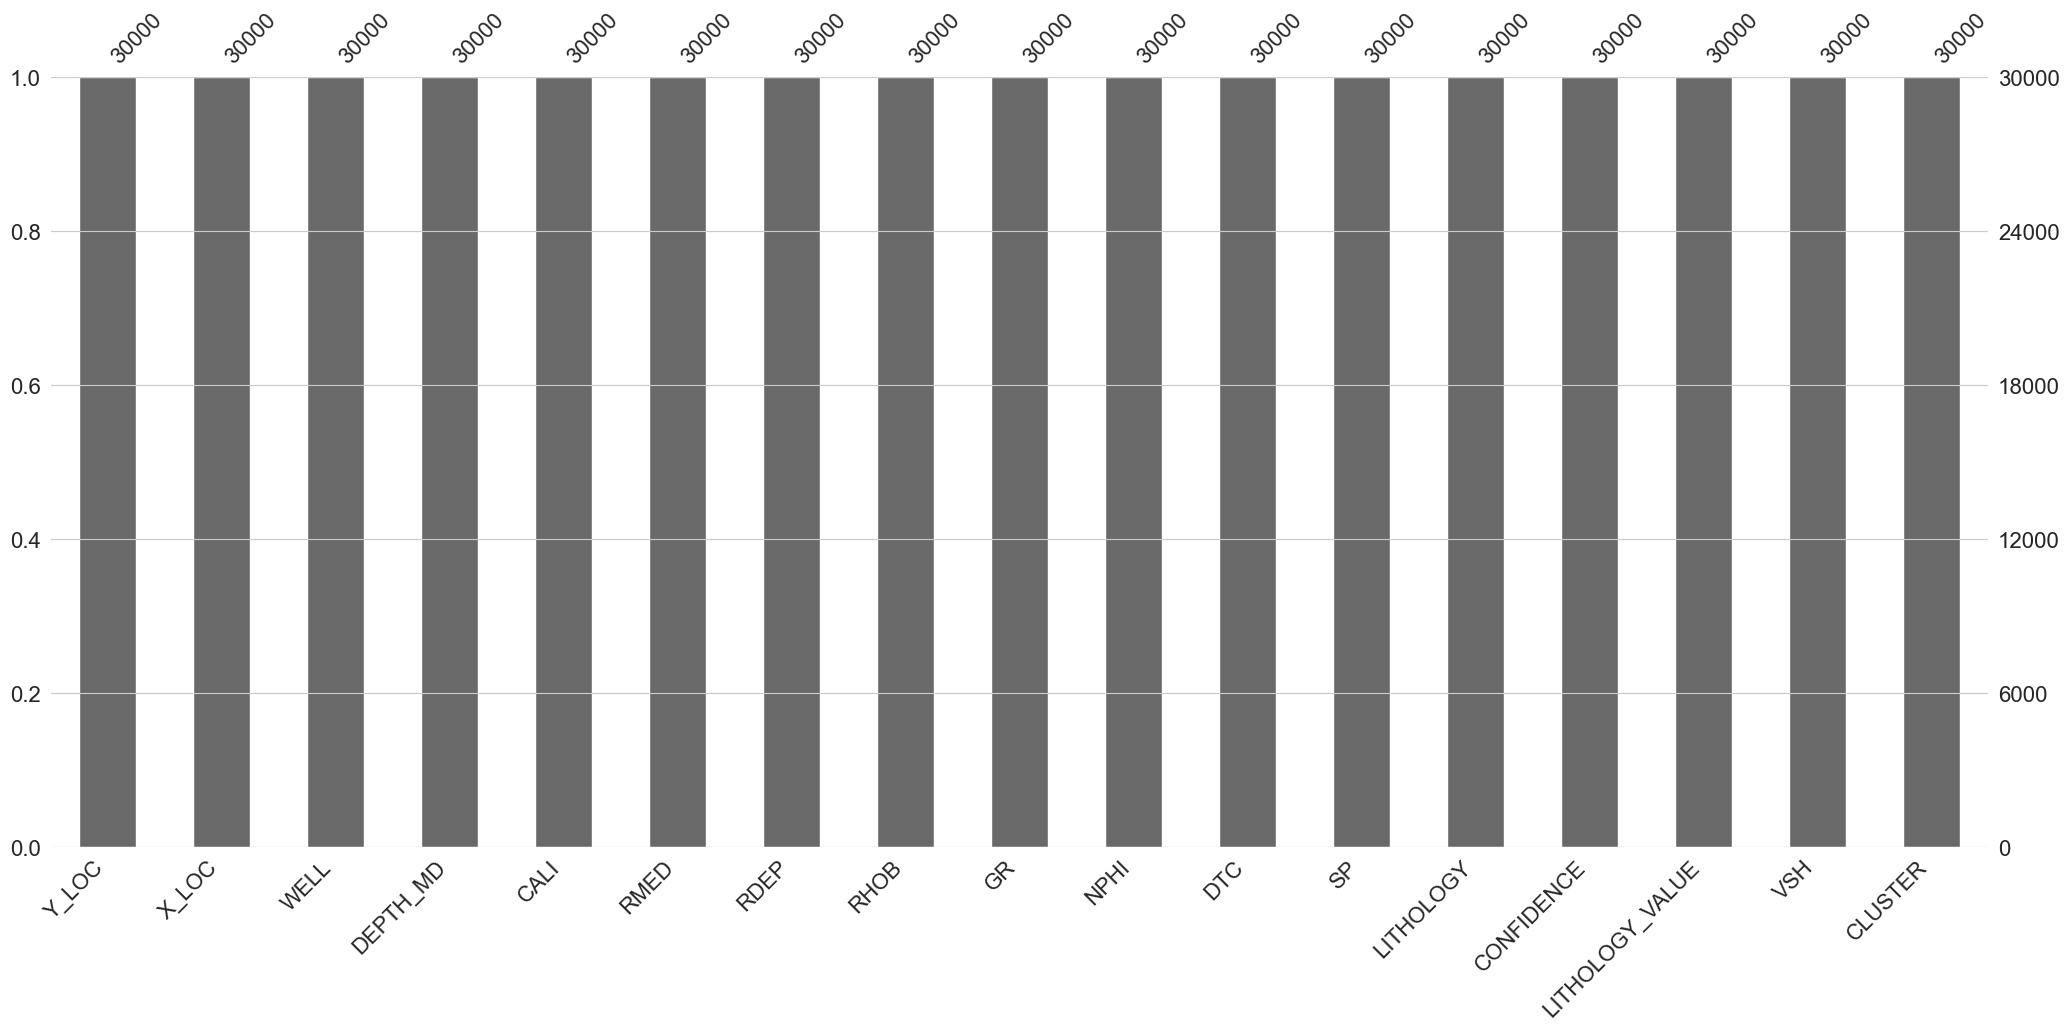

In [236]:
missingno.bar(data_4)

In [237]:
data_4.head()

,Y_LOC,X_LOC,WELL,DEPTH_MD,CALI,RMED,RDEP,RHOB,GR,NPHI,DTC,SP,LITHOLOGY,CONFIDENCE,LITHOLOGY_VALUE,VSH,CLUSTER
609130,6738652.5,540001.00000,31/3-1,1761.053000,12.850500,0.914505,0.658469,2.247051,55.960781,0.217924,94.289001,132.765915,Sandstone,1.0,0,0.027776,1
404609,6570991.0,454904.34375,25/7-2,4198.944000,9.375000,8.742172,7.632111,2.538537,45.689552,0.152980,81.342453,140.221130,Sandstone,1.0,0,0.111414,0
49083,6478966.0,438597.03125,15/9-17,2463.021998,12.266000,0.519616,0.447319,2.158200,31.003292,0.285446,102.194832,33.532612,Sandstone,1.0,0,0.086258,2
406256,6570991.5,454934.21875,25/7-2,4449.288000,7.921933,7.410629,7.600919,2.729214,47.738213,0.194607,71.942795,157.592346,Sandstone,1.0,0,0.118722,0
585762,6758506.5,526929.31250,31/2-8,2554.188980,11.879409,0.962936,0.735934,2.275639,52.501270,0.270675,91.829849,65.395775,Sandstone,1.0,0,0.065254,1


In [238]:
data_4.to_csv('escenario_2.csv')